# Project: Banks - Customer segmentation 
### Assignment and brief information 
Analysis of M.bank data. The bank is located in City1 and regional cities: City2 and City3.
It is required to analyze the clients of a regional bank and segment users by the number of products consumed.

### Research objectives:
* see insights in the data and share them with the product manager (focus/goal - new products, in particular - premium bank cards)
* understand whether (and if so, how exactly) the number of products a customer uses is related to his profitability
* segment customers into different groups (the key metric is the number of products used)
* describe the portraits of typical users for each group
* develop recommendations for working with customer segments, propose various activities for targeted and effective work with groups to achieve business results (promotion of new products, for example, premium bank cards)

## Description of data 
The dataset contains data about clients of M. Bank (bank_dataset.scv)

Columns:
- `userid` — user identifier,
- `score` — credit scoring points,
- `City` - city,
- `Gender` - gender,
- `Age` - age,
- `Objects` — number of objects owned,
- `Balance` — account balance,
- `Products` - the number of products that the client uses,
- `CreditCard` — whether there is a credit card,
- `Loyalty` — active client,
- `estimated_salary` — client’s salary,
- `Churn` — whether he left or not.

## Project structure (task decomposition)

### 1. [Exploratory Data Analysis (EDA)](#analysis)
   * [1.1. Loading and primary data processing
      (duplicates, missing values, structures and data types, etc.)](#analysis1)
   * [1.2. EDA: study of distributions of numerical/categorical features, correlation analysis, outliers, insights.](#analysis2)
  
### 2. [Customer segmentation based on data on the number of products consumed](#segmentation)
   * [2.1. Analyze characteristic values in groups/segments depending on the number of products used](#segmentation1)
   * [2.2. Construct graphs of the distribution of main characteristics by segments. Analyze their differences](#segmentation2)
   * [2.3. Analyze segments in relation to the churn factor. Draw conclusions about the propensity of segments to churn](#segmentation3)
   * [2.4. Describe a portrait of a typical client for each segment](#segmentation4)

### 3. [Testing statistical hypothesis](#hypothesis)
   * [Test the statistical hypothesis that there are differences in the income of those clients who use two bank products and those who use one](#hypothesis1)

### 4. [Conclusions and basic recommendations for working with segments](#conclusion)
   * Form the main conclusions and offer recommendations for the strategy of interaction with users in various segments

### 5. [Additional analysis - ML Customer clustering:](#clustering)
   * [5.1. Perform clustering using the k-means method](#clustering1)
   * [5.2. Analyze the proposed clusters based on average values, construct feature distributions for clusters](#clustering2)
   * [5.3. See connections with the analysis carried out earlier using methods of grouping and highlighting segments. Formulate the recommendations given above](#clustering3)

<a id="analysis"></a>
## 1. Exploratory Data Analysis (EDA) 

<a id="analysis1"></a>
### 1.1. Loading and primary data processing 

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# remove the limit on the number and width of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Load the table from an external drive
file_id = '1KyLlxQgYK2uV9kv8N7ER2_QnwHi94938'
download_link = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(download_link)
data

userid  score   City Gender  Age  Objects    Balance  Products  \
0     15677338  619    City1  F      42   2       NaN         1          
1     15690047  608    City3  F      41   1        83807.86   1          
2     15662040  502    City1  F      42   8        159660.80  3          
3     15744090  699    City1  F      39   1       NaN         2          
4     15780624  850    City3  F      43   2        125510.82  1          
...        ...  ...      ... ..      ..  ..              ... ..          
9995  15648965  771    City1  M      39   5       NaN         2          
9996  15612628  516    City1  M      35   10       57369.61   1          
9997  15627268  709    City1  F      36   7       NaN         1          
9998  15725091  772    City2  M      42   3        75075.31   2          
9999  15671055  792    City1  F      28   4        130142.79  1          

      CreditCard  Loyalty  estimated_salary  Churn  
0     1           1        101348.88         1      
1     0           1        112542.58         0      
2     1           0        113931.57         1      
3     0           0        93826.63          0      
4     1           1        79084.10          0      
...  ..          ..             ...         ..      
9995  1           0        96270.64          0      
9996  1           1        101699.77         0      
9997  0           1        42085.58          1      
9998  1           0        92888.52          1      
9999  1           0        38190.78          0      

[10000 rows x 12 columns]

In [5]:
# Check structure, data types, data completeness and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# Check for complete duplicates
data.duplicated().sum()

0

* Overall, the data is of good quality. Not much pre-processing required
* Data types are correct and do not require conversion
* There are no obvious duplicates
* Replace all column names with lowercase letters for convenience
* Missing values are observed only for the balance column, which is absolutely normal and understandable.
* Perhaps later we will replace NaN with a marker, but for now we will leave it as it is. NaN also gives us some information - not all clients, in principle, use such a product as an account (NaN and zero balance allow us to draw different conclusions)
* The names of cities, as well as gender, may be “digitized” later, if necessary. For now we leave them as categorical variables

In [7]:
# Convert all column names to lowercase
data.columns = [x.lower() for x in data.columns]
data.head()

userid  score   city gender  age  objects    balance  products  \
0  15677338  619    City1  F      42   2       NaN         1          
1  15690047  608    City3  F      41   1        83807.86   1          
2  15662040  502    City1  F      42   8        159660.80  3          
3  15744090  699    City1  F      39   1       NaN         2          
4  15780624  850    City3  F      43   2        125510.82  1          

   creditcard  loyalty  estimated_salary  churn  
0  1           1        101348.88         1      
1  0           1        112542.58         0      
2  1           0        113931.57         1      
3  0           0        93826.63          0      
4  1           1        79084.10          0

<a id="analysis2"></a>
### 1.2. EDA: feature distribution, correlation analysis

In [8]:
# See what the data looks like statistically (average, standard deviation, min and max values)
data.drop('userid', axis=1).describe().round(1)

score      age  objects   balance  products  creditcard  loyalty  \
count  10000.0  10000.0  10000.0  6383.0    10000.0   10000.0     10000.0   
mean   650.5    38.9     5.0      119827.5  1.5       0.7         0.5       
std    96.7     10.5     2.9      30095.1   0.6       0.5         0.5       
min    350.0    18.0     0.0      3768.7    1.0       0.0         0.0       
25%    584.0    32.0     3.0      100182.0  1.0       0.0         0.0       
50%    652.0    37.0     5.0      119839.7  1.0       1.0         1.0       
75%    718.0    44.0     7.0      139512.3  2.0       1.0         1.0       
max    850.0    92.0     10.0     250898.1  4.0       1.0         1.0       

       estimated_salary    churn  
count  10000.0           10000.0  
mean   100090.2          0.2      
std    57510.5           0.4      
min    11.6              0.0      
25%    51002.1           0.0      
50%    100193.9          0.0      
75%    149388.2          0.0      
max    199992.5          1.0

* Average churn is 20%
* Average number of products per 1 user - 1.5
* 7 out of 10 customers have a credit card
* On average, only half of clients are currently considered active (loyalty=0.5)

In [9]:
# See if the overall correlation matrix and matrix heatmap show anything
data.drop('userid', axis=1).corr().round(2)

score   age  objects  balance  products  creditcard  \
score             1.00  -0.00  0.00    -0.00     0.01     -0.01         
age              -0.00   1.00 -0.01    -0.01    -0.03     -0.01         
objects           0.00  -0.01  1.00     0.01     0.01      0.02         
balance          -0.00  -0.01  0.01     1.00    -0.00      0.01         
products          0.01  -0.03  0.01    -0.00     1.00      0.00         
creditcard       -0.01  -0.01  0.02     0.01     0.00      1.00         
loyalty           0.03   0.09 -0.03    -0.02     0.01     -0.01         
estimated_salary -0.00  -0.01  0.01    -0.00     0.01     -0.01         
churn            -0.03   0.29 -0.01     0.02    -0.05     -0.01         

                  loyalty  estimated_salary  churn  
score             0.03    -0.00             -0.03   
age               0.09    -0.01              0.29   
objects          -0.03     0.01             -0.01   
balance          -0.02    -0.00              0.02   
products          0.01     0.01             -0.05   
creditcard       -0.01    -0.01             -0.01   
loyalty           1.00    -0.01             -0.16   
estimated_salary -0.01     1.00              0.01   
churn            -0.16     0.01              1.00

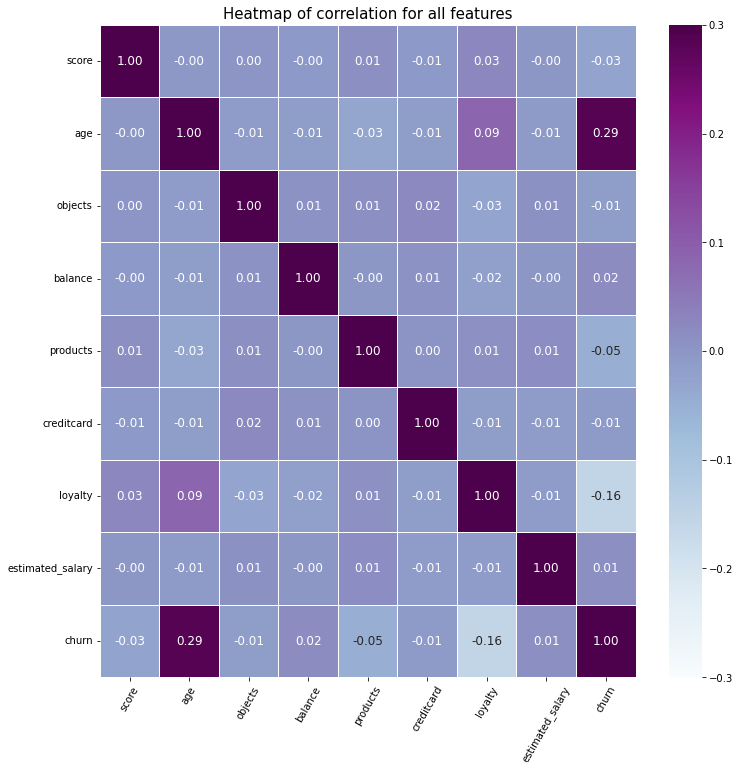

In [10]:
# Apply the heatmap method to display the correlation matrix in the form of a heat map of the relationship of all available features with each other
corr_m=data.drop('userid', axis=1).corr()
plt.figure(figsize = (12,12))
sns.heatmap(data=corr_m, annot = True, linewidths=1, linecolor='white',cmap="BuPu", fmt='.2f', vmax=0.3, vmin=-0.3, cbar=True, annot_kws={"size": 12})
plt.xticks(rotation=60) 
plt.yticks(rotation=0) 
plt.title('Heatmap of correlation for all features', fontsize=15)
plt.show()

* The diagram provides no insights
* The correlation is noticeable (0.3) only for the age-churn ratio and there is a smaller correlation (0.16) between loyalty-churn

In [11]:
# general analysis of the feature distribution and their correlation taking into account the territorial breakdown
data['city'].value_counts()

City1    5014
City2    2509
City3    2477
Name: city, dtype: int64

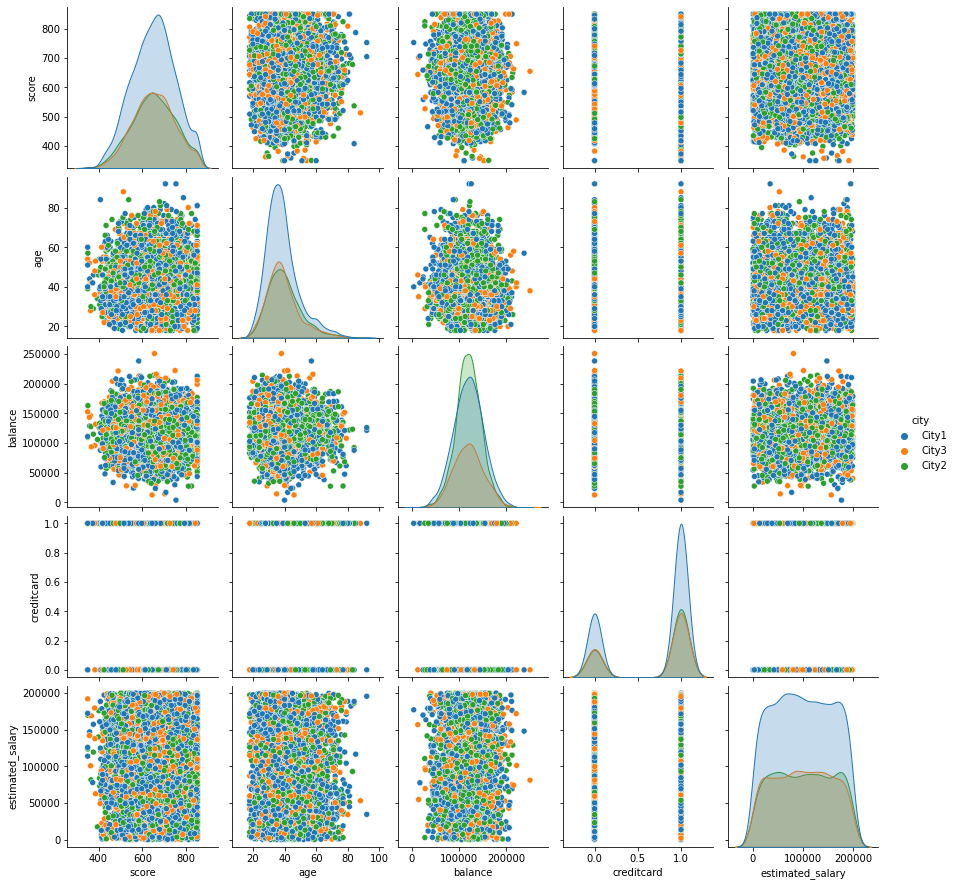

In [12]:
# Pairplot for some features based on client location (city)
sns.pairplot(vars = ['score', 'age', 'balance', 'creditcard','estimated_salary'], data=data, hue='city')
plt.show()

* Simultaneous comparison of many features is difficult, but some insights, or rather questions, emerge
* One of the significant conclusions is that there were no significant differences between the cities according to the characteristics being compared. The feature is distributed in a very similar way
* There is a noticeable difference in balance - in City1 there are more people with larger balances
* the same can be said about the client having a credit card - there are more such people in City1
* There are some minor differences in the distribution of estimated_salary, and in general it appears that there are higher income clients in City2


In [13]:
data.head(1)

userid  score   city gender  age  objects  balance  products  creditcard  \
0  15677338  619    City1  F      42   2       NaN       1         1            

   loyalty  estimated_salary  churn  
0  1        101348.88         1

* To reflect the general distribution of data, we will construct graphs of two types:
     - for continuous quantities we will build a boxplot
     - for discrete and binary - countplot
     - we will save the breakdown by city

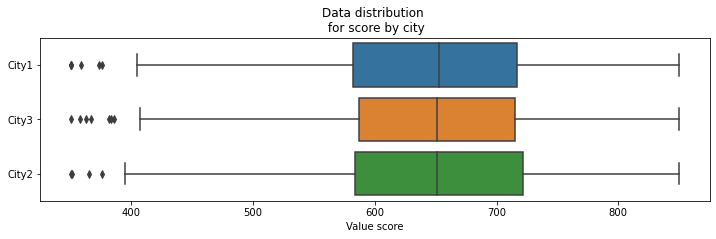

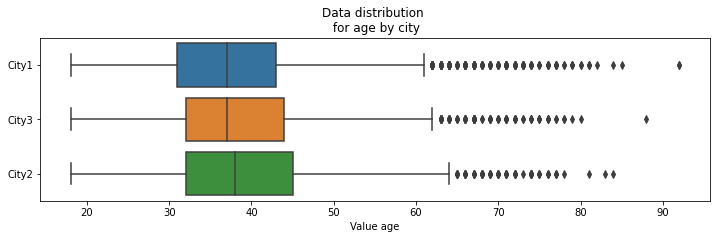

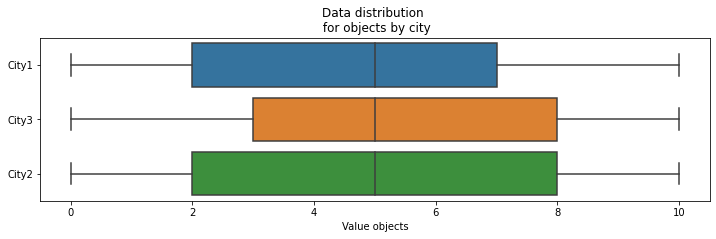

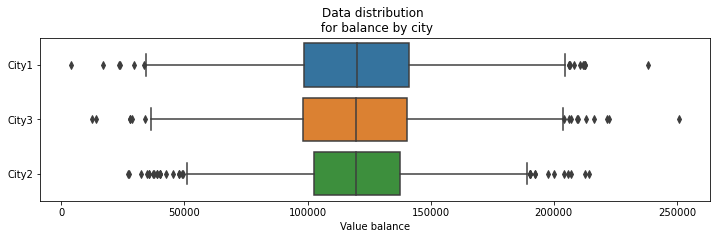

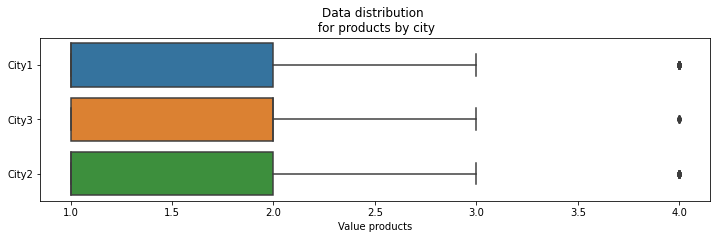

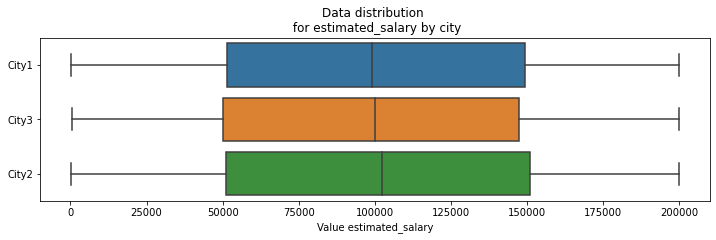

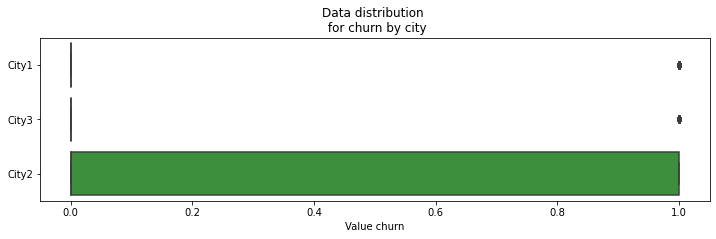

In [14]:
for column in data.drop(columns =  ['userid', 'city', 'gender', 'creditcard', 'loyalty']).columns:
    fig,ax = plt.subplots(figsize=(12,3))
    ax=sns.boxplot(data[column], data.city, ax=ax,  orient='h', saturation=0.7)
    plt.title('Data distribution \n for '+ str(column) + ' by city')
    plt.xlabel('Value ' + column)
    plt.ylabel('')
    plt.show()

In [15]:
#data.query('city == "City1"')['churn'].mean() #16%
#data.query('city == "City3"')['churn'].mean() #17%
data.query('city == "City2"')['churn'].mean() #32%

0.32443204463929853

* Let's start with the last graph, where we noticed a strange situation regarding the outflow rate in the city City2. And a simple calculation shows that the churn among clients in this city is one third of all clients (32%), which is 2 times higher than in other analyzed cities. This is very important information, and we will further take it into account when analyzing churn and developing measures and recommendations.
* Based on other indicators, the following conclusions can be drawn:
     - The score indicator is distributed very evenly, there are downward outliers in all cities. The median for everyone is 650 points
     - The age in City2 is slightly higher than in other cities, but there are much more emissions in City1 (on the older side). The average median age in all cities is 37-38 years
     - The number of objects is on average the same for all cities, distributed evenly, on average 5
     - The current account balance is on average the same for all cities and is about 120 thousand. The largest range of distribution is in City1
     - The number of products per 1 client is on average the same in all cities, and this is very important information for our analysis. I also note that there are very few clients with 4 products
     - The estimated_salary parameter is also almost at the same median level and is about 100 thousand. Interestingly, the spread of income is also absolutely identical

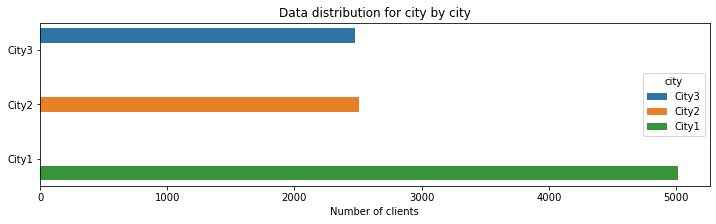

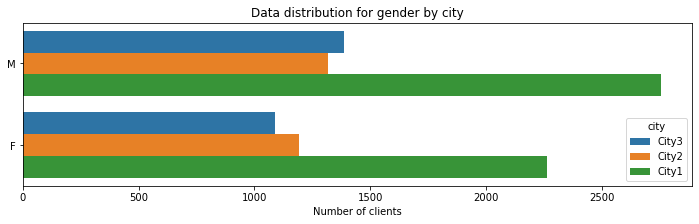

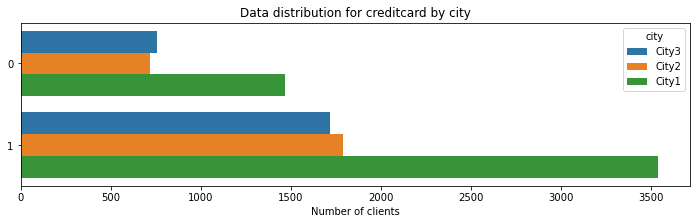

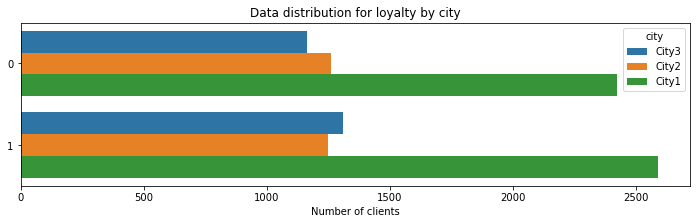

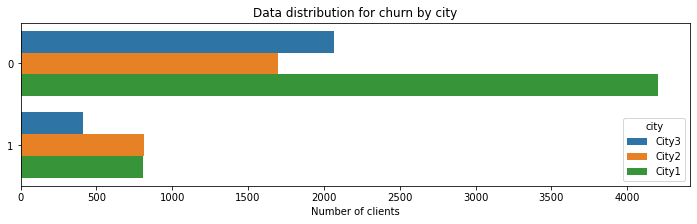

In [16]:
# for discrete and binary quantities we use countplot diagram
for column in data.drop(['userid','score', 'age', 'objects', 'balance', 'products', 'estimated_salary'],axis=1).columns:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.countplot(y=column, hue='city', data=data.sort_values(by='city', ascending=False), ax=ax, saturation=0.8, orient ='h')
    plt.title('Data distribution for '+ str(column) + ' by city')
    plt.xlabel('Number of clients')
    plt.ylabel('')
    plt.show()

* Half of the analyzed clients are located in City1, the remaining cities are divided by approximately a quarter
* In general, there are slightly more male clients than female clients
* As already noted, City1 is the leader in the number of clients with credit cards
* Based on loyalty, as noted above, approximately half of the clients remain active, half are no longer active. The distribution by city is the same
* Churn will be analyzed separately, but in general, in the structure by city, it is noted that the outflow in City2 is equal in the number of clients to the outflow in City1. But in percentage terms, City2 has a much higher outflow, as has already been noted, calculated and described above

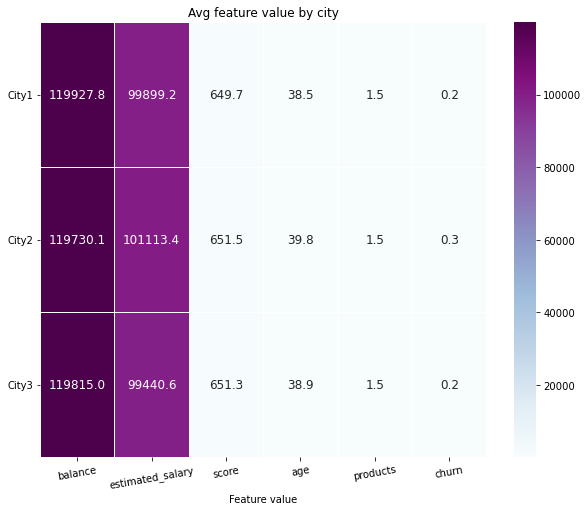

In [17]:
# Look at some features by city
plt.figure(figsize = (10,8))
sns.heatmap(data=data.groupby(['city'])['balance','estimated_salary', 'score', 'age', 'products','churn']\
            .mean().round(1).sort_values(by='city'), annot = True\
            ,linewidths=1, linecolor='white',cmap="BuPu", fmt='.1f', annot_kws={"size": 12})
plt.xticks(rotation=10) 
plt.yticks(rotation=0)
plt.title('Avg feature value by city')
plt.ylabel('')
plt.xlabel('Feature value')
plt.show()

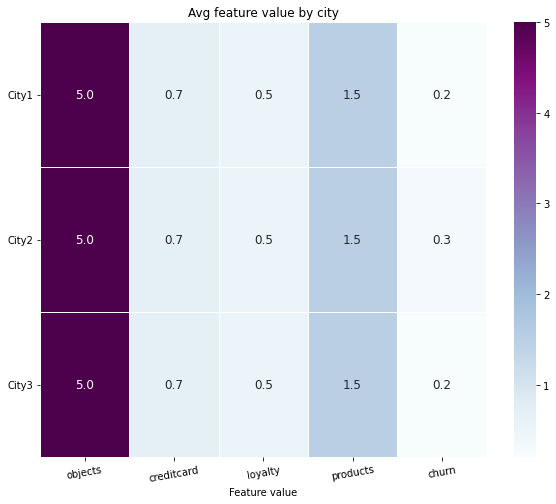

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(data=data.groupby(['city'])['objects', 'creditcard', 'loyalty', 'products','churn']\
            .mean().round(1).sort_values(by='city'), annot = True, linewidths=1, linecolor='white',cmap="BuPu"\
            ,fmt='.1f', annot_kws={"size": 12})
plt.xticks(rotation=10) 
plt.yticks(rotation=0)
plt.title('Avg feature value by city')
plt.ylabel('')
plt.xlabel('Feature value')
plt.show()

* Visualization using a heat map helps to see the picture and confirm the conclusions made above

<a id="segmentation"></a>
## 2. User segmentation based on data on the number of products consumed

<a id="segmentation1"></a>
### 2.1. Analyze the values of features in groups/segments depending on the number of products used

In [19]:
# Look at the unique values by the number of products used
data['products'].unique()

array([1, 3, 2, 4], dtype=int64)

In [20]:
# See how many users are in each group
data['products'].value_counts()

1    5084
2    4590
3    266 
4    60  
Name: products, dtype: int64

* groups with 1 and 2 products are the most numerous and make up approximately half of the entire dataset
* there are not many clients with 4 products, only 60
* the behavior of groups may differ, including the behavior of even small groups that can stand out clearly (Pareto's rule). We have to test this in practice

In [21]:
# Group customers by number of products and look at the average indicators of all characteristics
data.drop('userid', axis=1).groupby('products').mean().round(1).reset_index()

products  score   age  objects   balance  creditcard  loyalty  \
0  1         649.1  39.7  5.0      119894.2  0.7         0.5       
1  2         652.2  37.8  5.1      119660.9  0.7         0.5       
2  3         648.1  43.2  5.0      119475.7  0.7         0.4       
3  4         653.6  45.7  5.3      122260.6  0.7         0.5       

   estimated_salary  churn  
0  99487.3           0.3    
1  100452.0          0.1    
2  104318.1          0.8    
3  104763.7          1.0

* All users are divided into 4 categories depending on the use of 1, 2, 3 or 4 products at the same time
* The average score, balance, credit card availability, and estimated_salary are practically the same between groups
* There is a noticeable age difference - with 3 and 4 products the average age is slightly older
* A significant difference was noticed in the churn rate - it is highest in the group with 3 and 4 products and minimal in the group of clients with 2 products
* In group 4 the situation is ambiguous - every single client fell into churn (average churn = 1), half of them are already inactive (loyalty = 0)

In [22]:
# Recheck the last statement
print('Average churn in the group with 4 products: ', data.query('products == 4')['churn'].mean())

Average churn in the group with 4 products:  1.0


In [23]:
# See how many of them are active/inactive clients
data.query('products == 4')['loyalty'].value_counts()

0    31
1    29
Name: loyalty, dtype: int64

In [24]:
# Display the group with 4 products
data.query('products == 4')

userid  score   city gender  age  objects    balance  products  \
7     15698884  376    City2  F      29   4        115046.74  4          
70    15746529  738    City2  M      58   2        133745.44  4          
1254  15653119  628    City1  F      46   1        46870.43   4          
1469  15713110  819    City2  F      49   1        120656.86  4          
1488  15668560  596    City3  M      30   6        121345.88  4          
1701  15648015  792    City1  M      50   9       NaN         4          
1876  15707490  640    City2  M      39   9        131607.28  4          
2124  15646587  704    City1  M      32   7        127785.17  4          
2196  15834436  773    City2  M      47   2        118079.47  4          
2285  15826351  630    City2  M      50   3        129370.91  4          
2462  15747178  672    City1  F      53   9        169406.33  4          
2499  15677710  614    City1  F      37   8        75150.34   4          
2509  15732077  655    City1  F      50   10      NaN         4          
2541  15722506  611    City1  F      61   3        131583.59  4          
2614  15683582  546    City2  F      58   3        106458.31  4          
2617  15645471  692    City2  M      45   6        152296.83  4          
2872  15714327  439    City3  M      52   3        96196.24   4          
3152  15766897  644    City1  F      40   9        137285.26  4          
3365  15807167  671    City3  F      34   5        130929.02  4          
3841  15793514  653    City1  F      60   2        120731.39  4          
4013  15696512  720    City2  F      57   1        162082.31  4          
4014  15640650  641    City2  F      51   2        117306.69  4          
4166  15697298  850    City3  F      45   5        174088.30  4          
4260  15707291  587    City1  M      40   2       NaN         4          
4403  15659595  602    City2  F      43   2        113641.49  4          
4511  15610742  634    City1  F      45   2       NaN         4          
4516  15854946  497    City2  F      32   8        111537.23  4          
4606  15827694  797    City1  F      55   10      NaN         4          
4654  15636712  578    City2  F      31   5        102088.68  4          
4748  15801803  537    City2  F      37   7        158411.95  4          
4822  15848440  745    City1  F      32   2       NaN         4          
5010  15762244  575    City2  M      49   7        121205.15  4          
5137  15644330  698    City1  F      51   6        144237.91  4          
5235  15651264  645    City1  F      68   9       NaN         4          
5386  15711019  642    City1  M      48   9        118317.27  4          
5700  15855624  447    City1  M      41   3       NaN         4          
5904  15707006  692    City2  M      45   6        142084.04  4          
6150  15668497  632    City2  M      41   8        127205.32  4          
6172  15699558  568    City2  M      43   5        87612.64   4          
6279  15651074  757    City3  F      55   9        117294.12  4          
6750  15733282  618    City1  F      42   2       NaN         4          
6875  15708019  610    City1  F      57   7        72092.95   4          
7257  15691417  747    City1  F      47   5        139914.60  4          
7457  15711625  665    City2  F      43   2        116322.27  4          
7567  15793281  629    City1  M      44   5       NaN         4          
7698  15734249  592    City1  M      60   9       NaN         4          
7724  15716327  842    City1  M      44   3        141252.18  4          
7729  15723743  850    City1  F      35   2        128548.49  4          
8041  15744175  698    City3  F      50   1       NaN         4          
8590  15675930  771    City1  F      41   10       108309.00  4          
8683  15642065  697    City1  F      49   7        195238.29  4          
8850  15632937  500    City3  F      50   5       NaN         4          
8923  15612738  625    City2  F      55   8        118772.71  4          
9215  156669

* Let's check one important point. It was noticed that balance data was missing for a significant number of clients (NaN values)
* Let’s make the assumption that the information is correct and NaN is not just missing information, but an indication that the client never used his account and did not have a balance on it
* Given this assumption, zero on the balance and NaN will give different categories of users:
     - for example, for users with NaN the first steps would be to start using the account
     - and for the second (with a zero account balance) - keep more money in the account (possibly receiving some kind of reward for this)
* We are interested in what share of such customers (balance = NaN) in each product group

In [25]:
# Find the share of clients who do not use an account and do not have any balance for each group
(data.groupby('products').apply(lambda x: x.balance.isnull().sum()/len(x))).round(2)

products
1    0.18
2    0.57
3    0.37
4    0.23
dtype: float64

In [26]:
# Find the share of clients using the account and having some balance for each group
1-(data.groupby('products').apply(lambda x: x.balance.isnull().sum()/len(x))).round(2)

products
1    0.82
2    0.43
3    0.63
4    0.77
dtype: float64

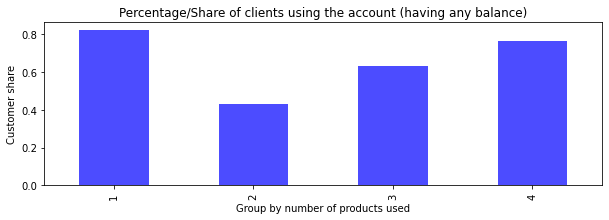

In [27]:
# Find the share of clients using the account and having some balance for each group
(1-data.groupby('products').apply(lambda x: x.balance.isnull().sum()/len(x))).plot(kind='bar', figsize =(10,3), color='b', alpha=0.7)
plt.title('Percentage/Share of clients using the account (having any balance)')
plt.xlabel('Group by number of products used')
plt.ylabel('Customer share')
plt.show()

* Note that the share of clients who never use the account is maximum in the second group (in the group with 2 products)
* A group with 1 product has a minimum % of customers who have never had a balance (NaN). Probably because this 1 product is the account itself (debit card)
* Also, presumably, clients with a NaN balance are clients who exclusively have a bank credit card

<a id="segmentation2"></a>
### 2.2. Construct the distribution diagrams of main features by segments. Analyze their differences

* Let's focus on analyzing the differences between product groups

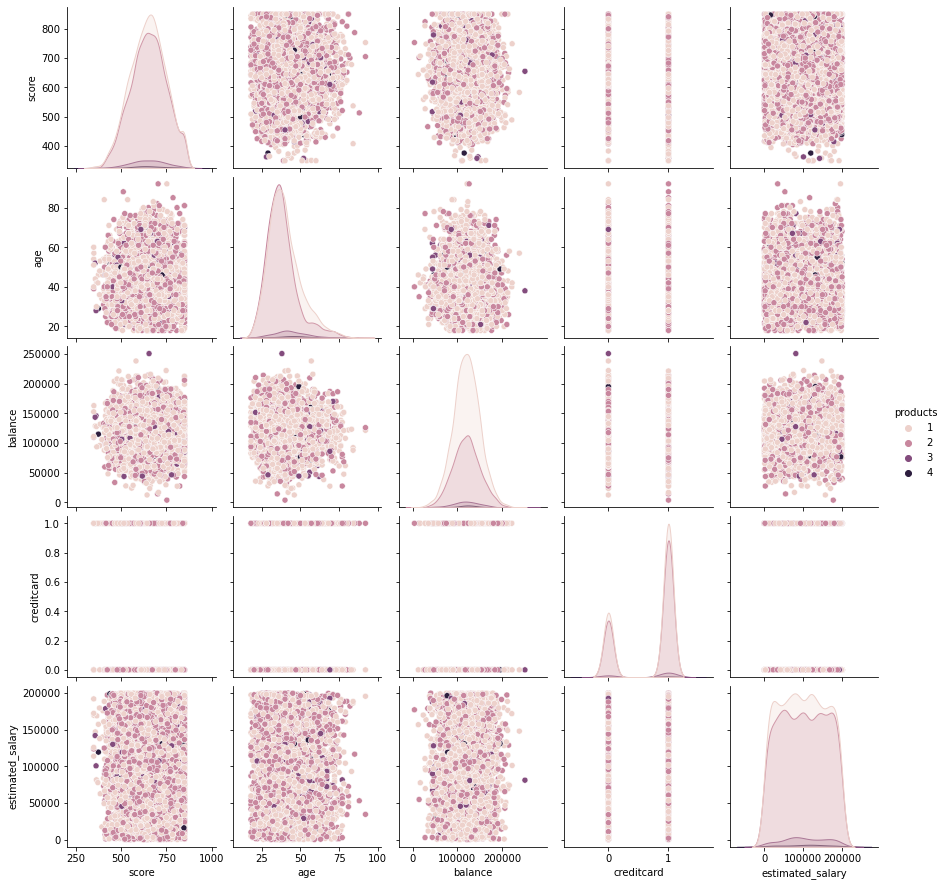

In [28]:
# Build a general pairplot for the main features and select products by dimension
sns.pairplot(vars = ['score', 'age', 'balance', 'creditcard','estimated_salary']\
             ,data=data,hue='products')
plt.show()

* There are a lot of factors, it is difficult to evaluate consistently
* Some insights do appear, for example:
     - the group with 4 products was completely included in the outflow. Why? Do these clients want special conditions, but they cannot provide them and they go to other banks?
     - more products are used by older people
     - the highest average balance is in the group of clients with 4 products
     - credit cards are more often used by clients from groups 1 and 2 (most likely, the card is just this one, or one of the two products used)
     - clients with 3 and 4 products have a higher estimated_salary
     - customers with 4 products have a significantly higher score

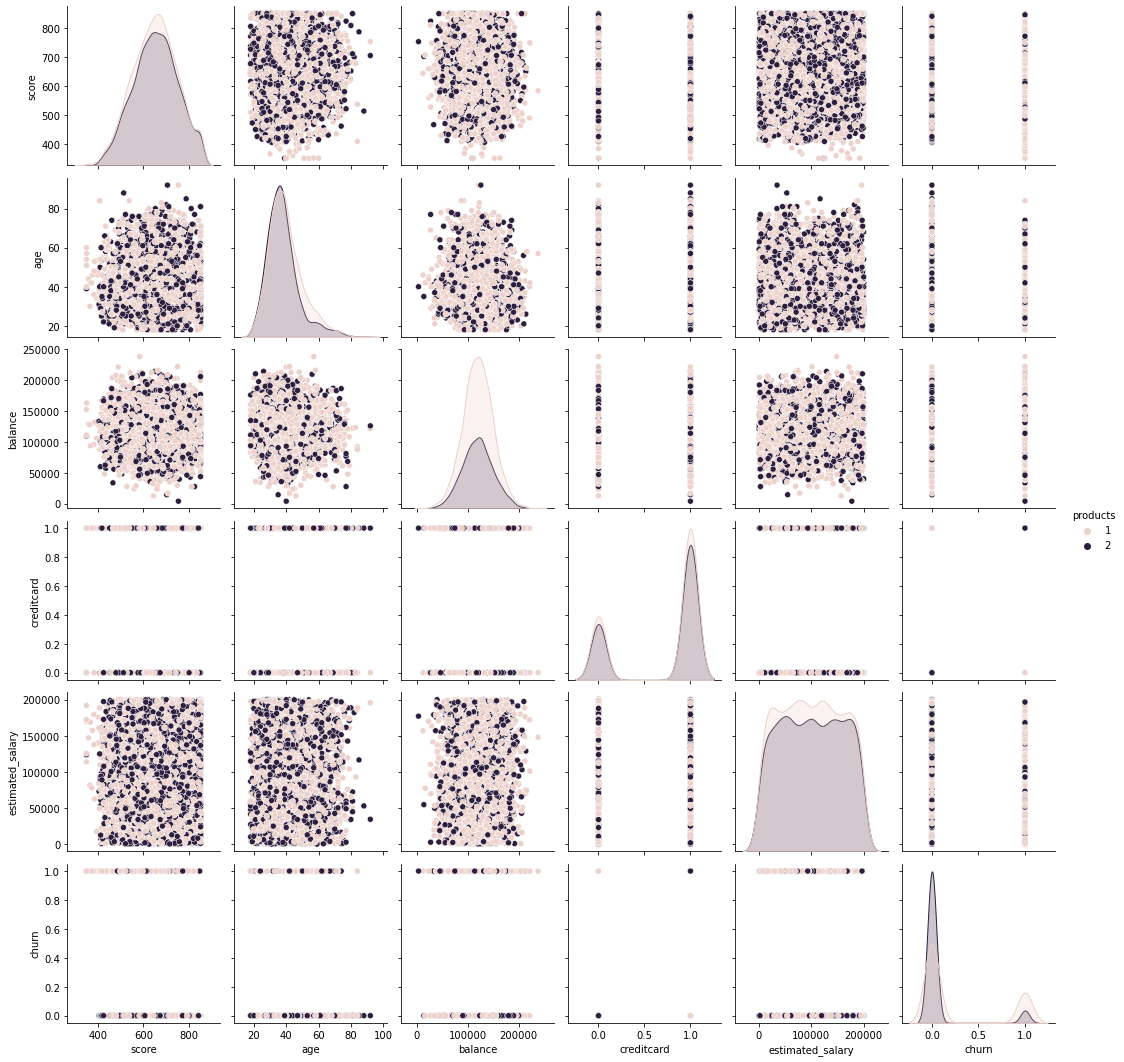

In [29]:
# Look separately at groups with 1 and 2 products
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(vars = ['score', 'age', 'balance', 'creditcard','estimated_salary', 'churn']\
             ,data=data.query('products in (1,2)'), hue='products')
plt.show()

- As expected, clients with 1 and 2 products are quite similar in their behavior
- the balance distribution of these groups is almost identical
- the distribution of estimated_salary for these groups is also almost identical
- the churn factor requires a more thorough analysis, because It seems that customers with 2 products leave more often

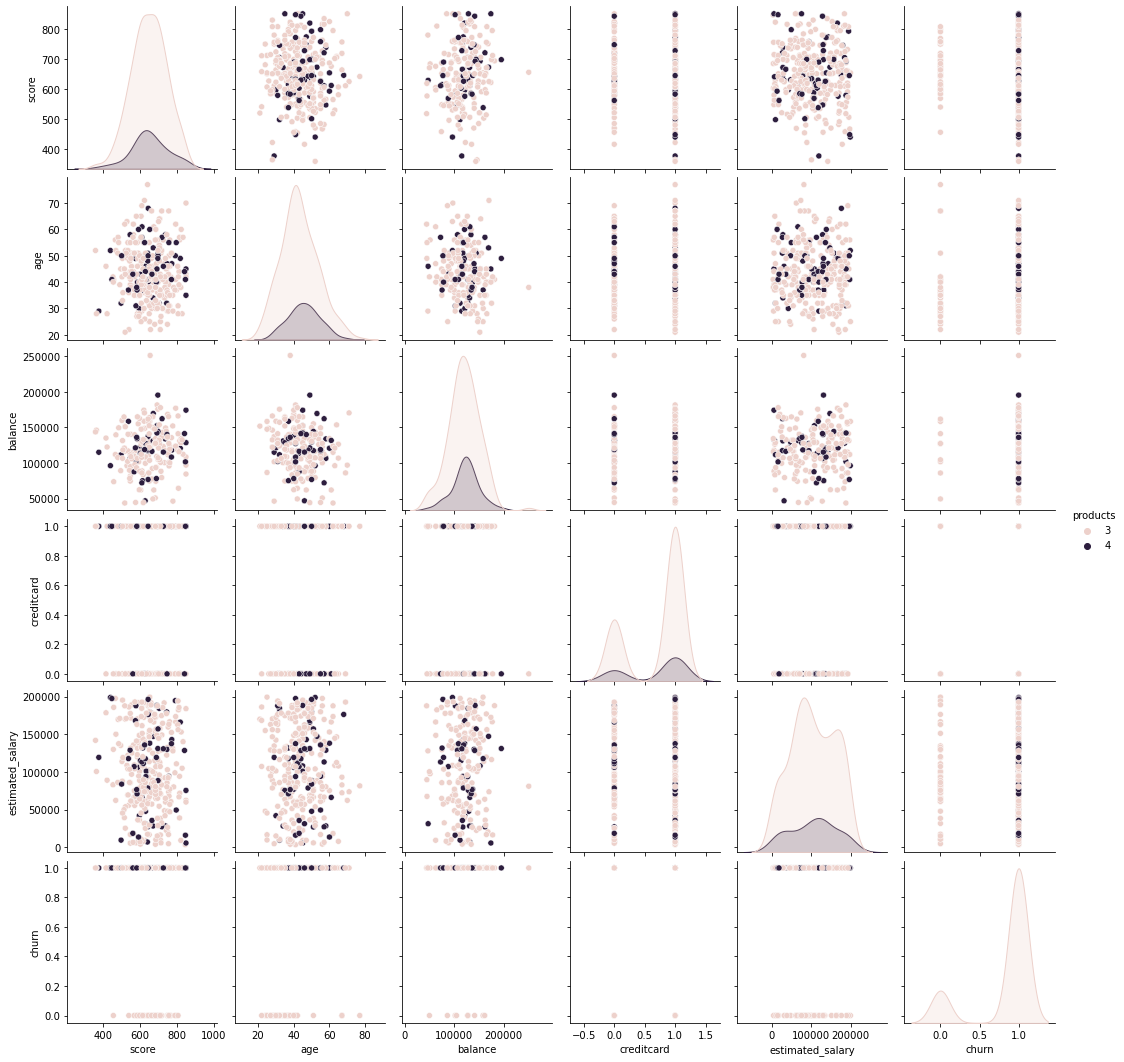

In [30]:
# Look separately at groups with 3 and 4 products
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(vars = ['score', 'age', 'balance', 'creditcard','estimated_salary', 'churn']\
             ,data=data.query('products in (3,4)'), hue='products')
plt.show()

* Let's look at groups with 3 and 4 products. You can confirm what has already been seen and said in the first graph:
     - score, balance is higher for the group with 4 products
     - Group 4 is more prone to churn, but in absolute terms, churn in the group with 3 products is also high
     - group with 3 products uses credit cards more
     - the group with 4 products is slightly older in age, on average
* The conclusion that comes from looking at pairwise comparisons is that groups based on similar behavior can be grouped together. This means we can allocate customers with 2 products into one group. If there are more than 2 products, then go to another one.

#### Let's look at the distribution of features across all 4 groups

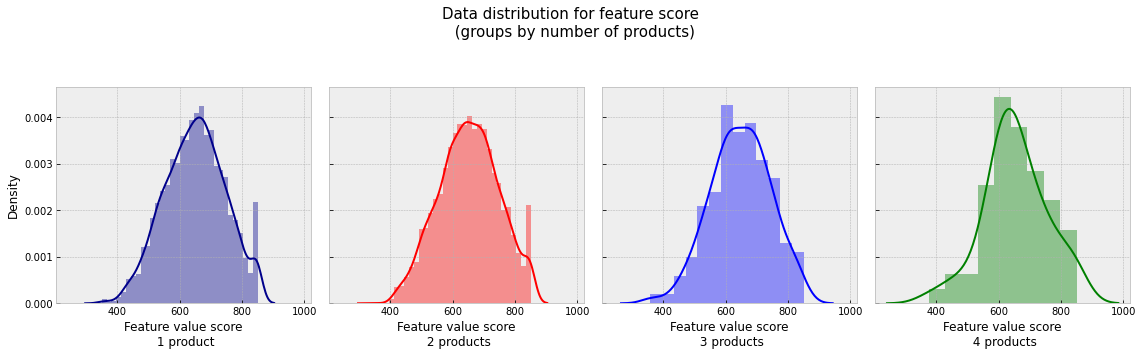

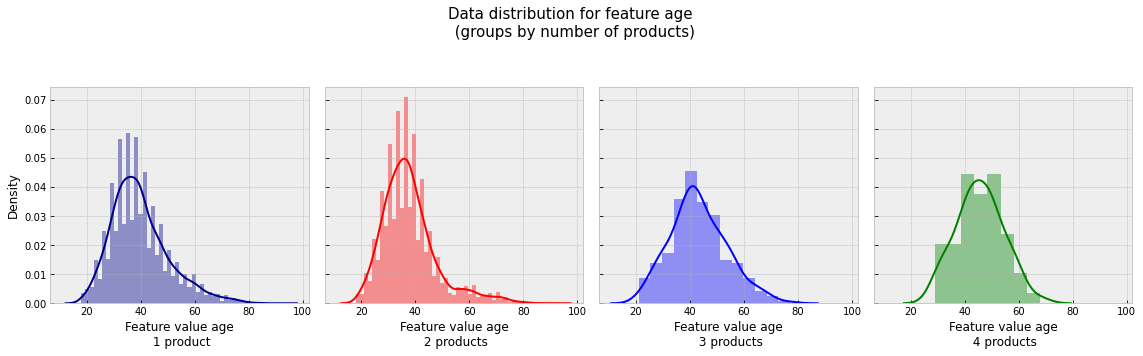

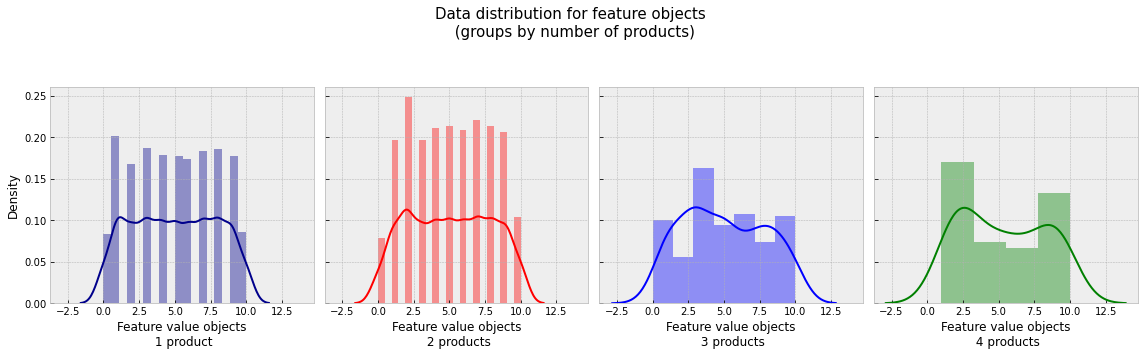

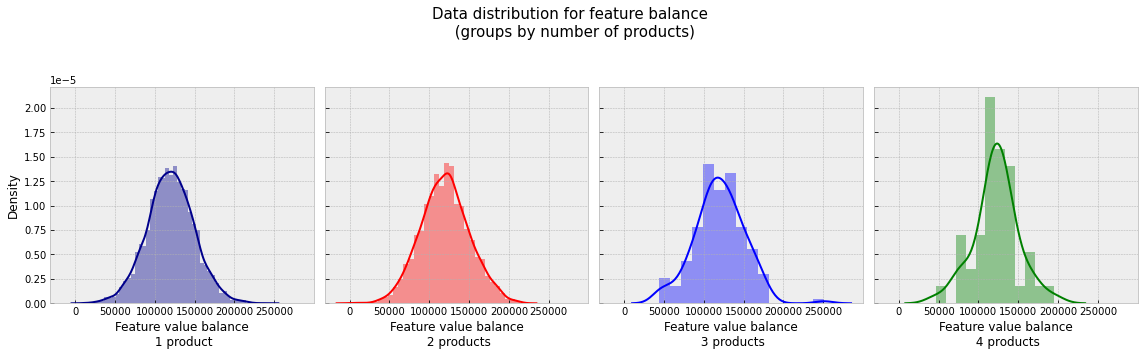

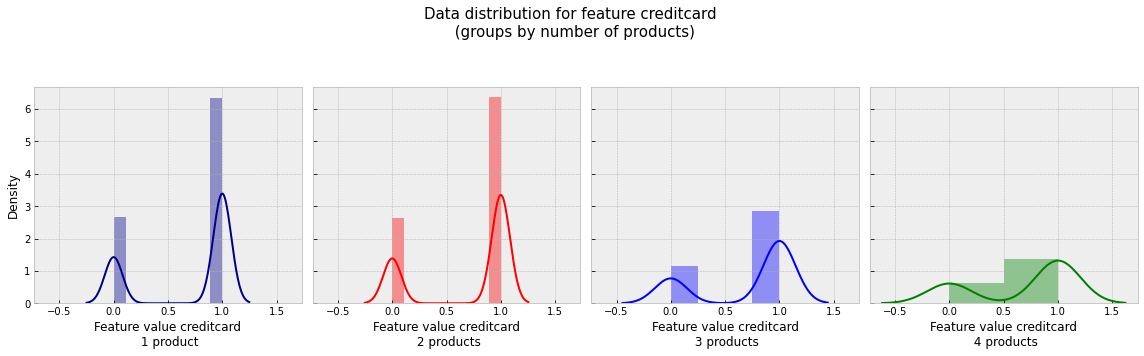

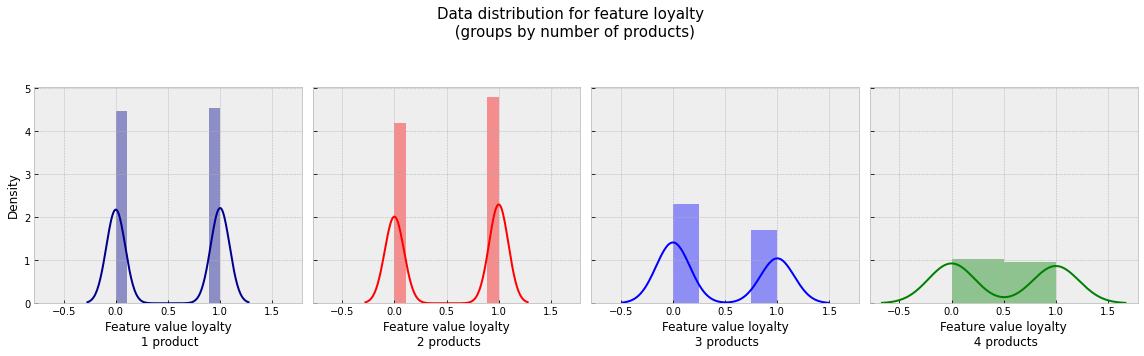

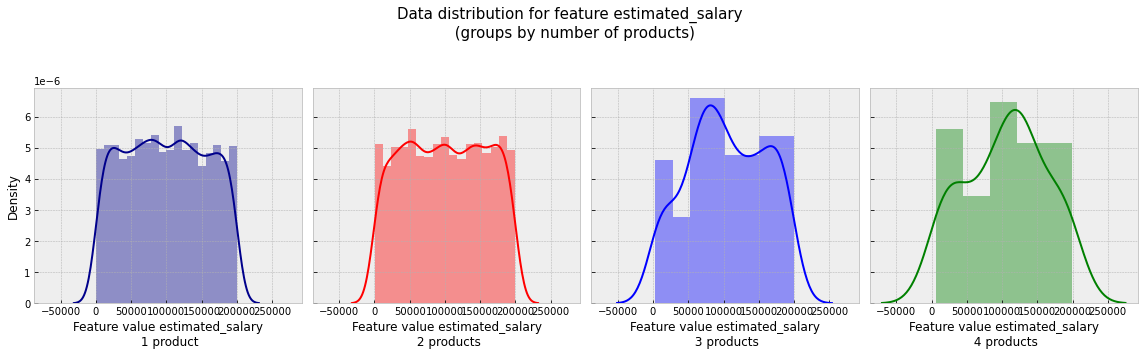

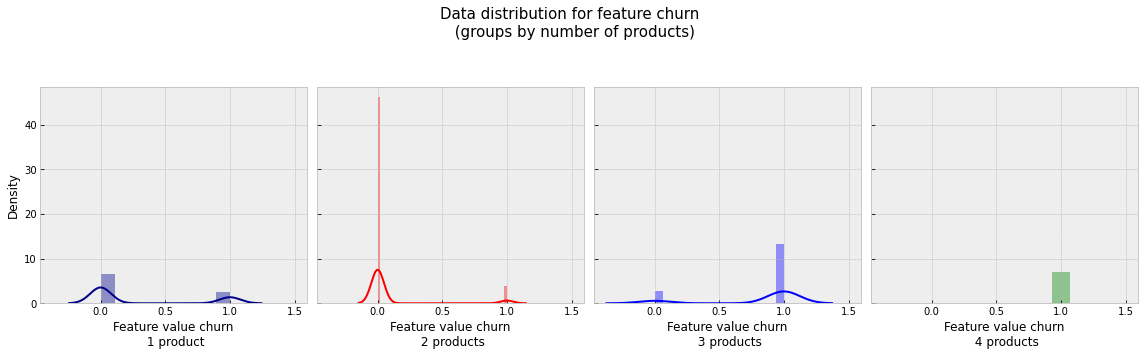

In [31]:
plt.style.use('bmh')
for column in data.drop(['userid','products', 'city', 'gender'],axis=1).columns:
    fig, ax = plt.subplots(1,4, figsize = (16,5),  tight_layout=True, sharey=True, sharex=True)
    #hist_range=(df[column].min(), df[column].max())
    sns.distplot(data.query('products == 1')[column].dropna(), hist=True, color='darkblue',ax = ax[0], norm_hist = True)
    sns.distplot(data.query('products == 2')[column].dropna(), hist=True, color='red',ax = ax[1], norm_hist = True)
    sns.distplot(data.query('products == 3')[column].dropna(), hist=True, color='blue',ax = ax[2], norm_hist = True)
    sns.distplot(data.query('products == 4')[column].dropna(), hist=True, color='green',ax = ax[3], norm_hist = True)
    ax[0].set_title(' \n')
    ax[1].set_title(' \n')
    ax[2].set_title(' \n')
    ax[3].set_title(' \n')
    ax[0].set_xlabel('Feature value '+ str(column)+ '\n 1 product')
    ax[1].set_xlabel('Feature value '+ str(column)+ '\n 2 products')
    ax[2].set_xlabel('Feature value '+ str(column)+ '\n 3 products')
    ax[3].set_xlabel('Feature value '+ str(column)+ '\n 4 products')
    plt.suptitle('Data distribution for feature ' + column + ' '   + '\n (groups by number of products)', fontsize=15)
    plt.show()

* Using the subplot function we can see the difference in the distribution of each attribute between groups with 1, 2, 3 or 4 products
* Generally speaking, the comparison shows that indeed, the behavior of groups 1-2 and 3-4 is similar in many respects
* Characteristics of churn and balance need to be viewed separately on an approximate scale
* Some characteristics also need to be analyzed in more detail: discrete - through boxplot and binary - through countplot
* What we see from this comparison:
     - customer ratings with 3-4 products are slightly higher
     - age in groups with 1 and 2 products is often filled in formally and has rounded values (peaks on round numbers) - most likely continuous applications and with a minimum of information from the client
     - a similar picture with the number of objects owned
     - as already noted, in a group with 4 products there are more clients with a higher balance
     - credit cards are most common in the first two groups
     - the situation according to estimated_salary is similar between groups, but the distribution in groups 3-4 is slightly different
     - churn requires separate analysis

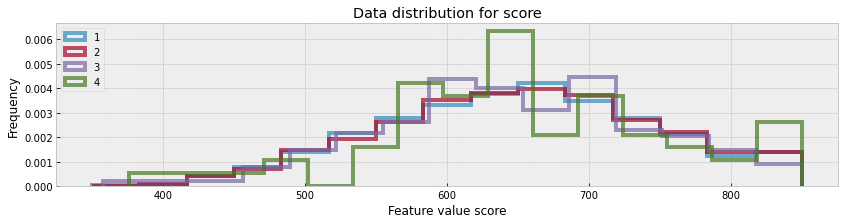

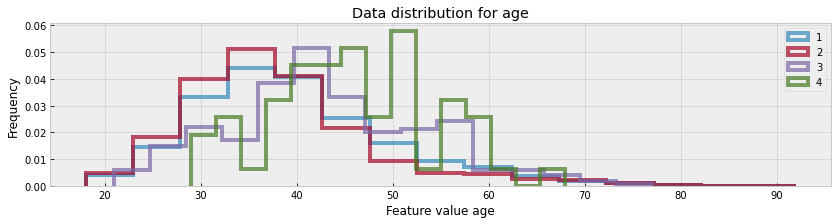

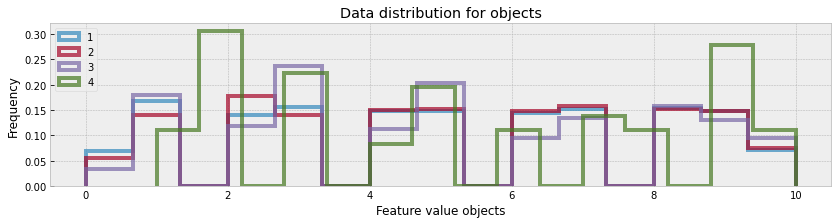

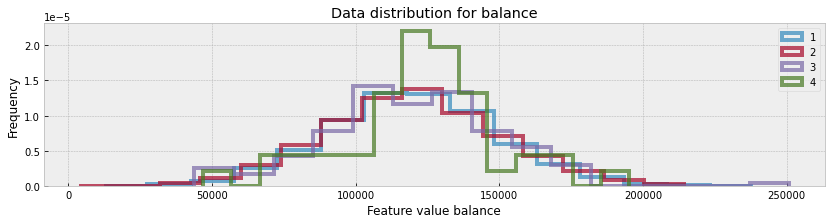

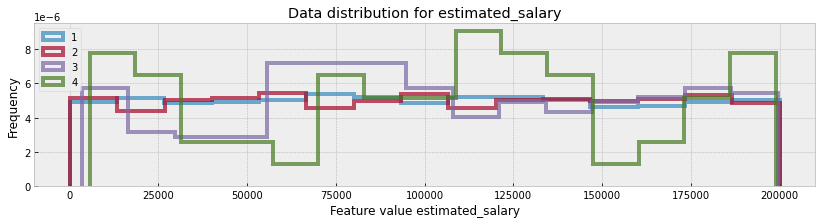

In [32]:
# And - overlaying sample diagrams
for column in data.drop(columns = ['userid', 'city','gender', 'creditcard', 'loyalty', 'churn', 'products']).columns:
    data.groupby('products')[column].plot(kind='hist', figsize = (14,3), bins=15, histtype='step', density=True, legend=True, alpha=0.7, linewidth=4, title='Data distribution for '+ str(column))  
    plt.xlabel('Feature value ' + column)
    plt.show()

* Not a very good graph for comparing 4 groups, but it gives some information and also confirms the conclusions already drawn
* Everything that was described earlier is confirmed in the graphs
* Definitely, the outflow is very different and we will analyze this indicator separately

* For binary values we use countplot

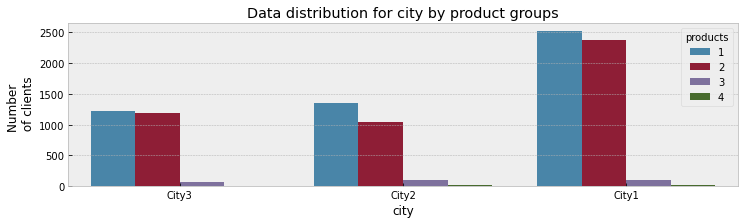

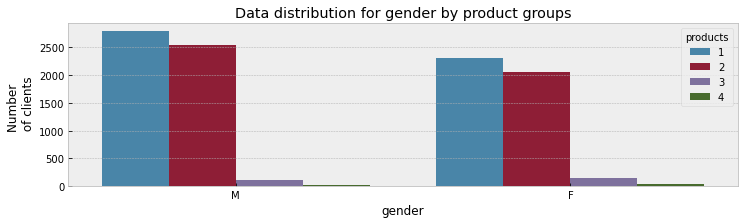

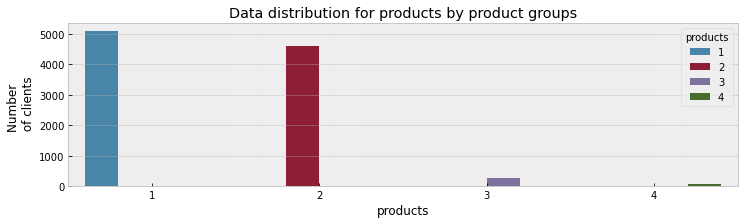

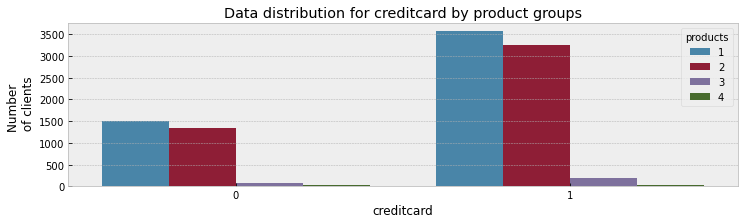

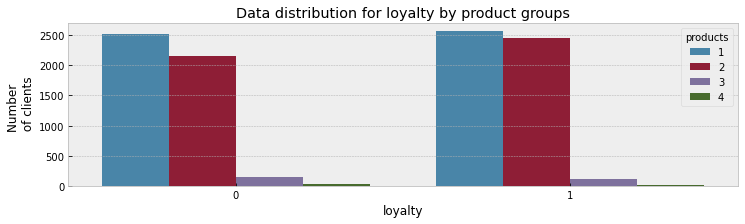

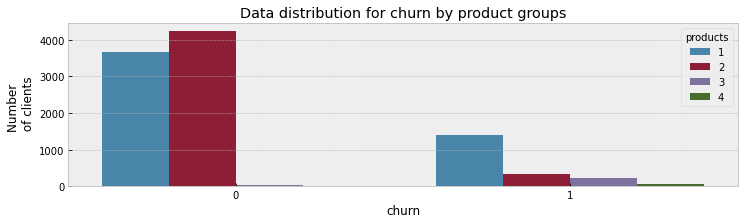

In [33]:
# Reset unnecessary columns and plot using countplot
for column in data.drop(columns=['userid','score', 'age', 'objects', 'balance', 'estimated_salary']).columns:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.countplot(x=column, hue='products',data=data.sort_values(by=column, ascending=False), ax=ax, saturation=0.7)
    plt.title('Data distribution for '+ str(column) + ' by product groups')
    plt.ylabel('Number \n of clients')
    #plt.xlabel('Value')
    plt.show()

* By city, we see that in all cities the main customer groups are customers with 1 and 2 products. There seem to be no clients with 4 products in City3 at all
* Gender indicator - for all products the share of men is slightly higher
* Among credit card users, the vast majority are customers with 1 and 2 products. Among customers with 4 products, an equal number with and without a credit card
* Based on the Churn attribute, we see that the group with 1 product is most prone to churn. The group with 4 products completely went into outflow. A group with 3 products is actively experiencing churn and the number of clients who have left is already much higher than the number of those remaining in this group

#### Let's try to combine groups according to the principle:
     - the client has up to 2 products (1 or 2)
     - the client has more than 2 products

In [34]:
# replace it
data['products_new'] = data['products']
data.loc[(data['products_new'] == 1, 'products_new')] = 0
data.loc[(data['products_new'] == 2, 'products_new')] = 0
data.loc[(data['products_new'] == 3, 'products_new')] = 1
data.loc[(data['products_new'] == 4, 'products_new')] = 1
data.head()

userid  score   city gender  age  objects    balance  products  \
0  15677338  619    City1  F      42   2       NaN         1          
1  15690047  608    City3  F      41   1        83807.86   1          
2  15662040  502    City1  F      42   8        159660.80  3          
3  15744090  699    City1  F      39   1       NaN         2          
4  15780624  850    City3  F      43   2        125510.82  1          

   creditcard  loyalty  estimated_salary  churn  products_new  
0  1           1        101348.88         1      0             
1  0           1        112542.58         0      0             
2  1           0        113931.57         1      1             
3  0           0        93826.63          0      0             
4  1           1        79084.10          0      0

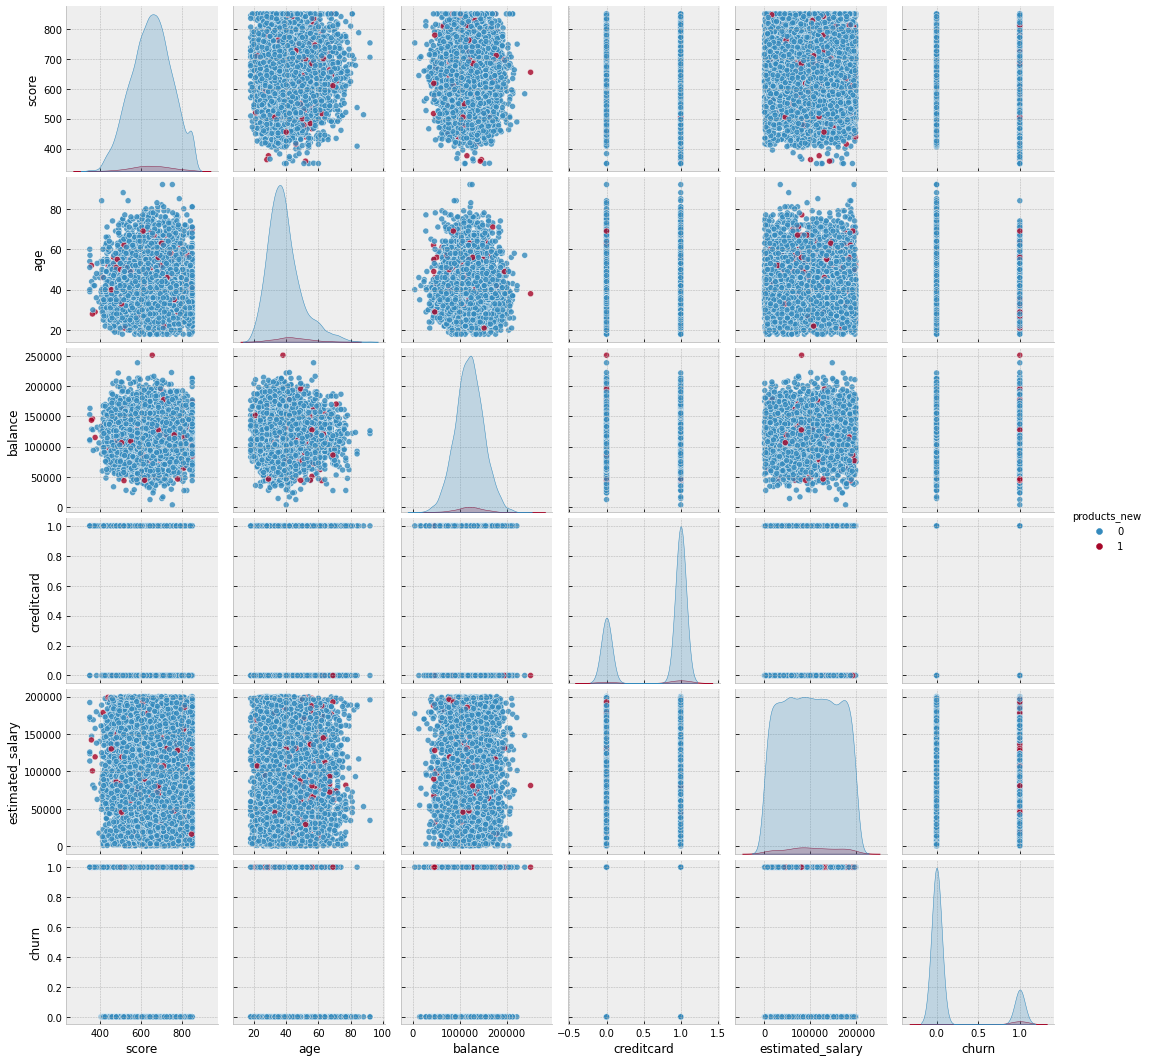

In [35]:
# New diagrams for two combined groups
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(vars = ['score', 'age', 'balance', 'creditcard','estimated_salary', 'churn']\
             ,data=data, hue='products_new', plot_kws={'alpha':0.8})
plt.show()

In [36]:
# Group clients into new/combined groups and look at the average indicators of all features
data.drop('userid', axis=1).groupby('products_new').mean().round(1)

score   age  objects   balance  products  creditcard  loyalty  \
products_new                                                                  
0             650.6  38.8  5.0      119818.9  1.5       0.7         0.5       
1             649.1  43.7  5.1      120074.3  3.2       0.7         0.4       

              estimated_salary  churn  
products_new                           
0             99945.0           0.2    
1             104400.1          0.9

* Distribution graphs and averages tell us that:
     - Indicators score, objects, balance, creditcard, loyalty, estimated_salary are almost identical between groups
     - The age indicator differs slightly, and in group 1 (more than 2 products) it is higher
     - Of course, the number of products is different (the principle by which we enlarged the groups): in group 0 it is 1.5 products on average, in group 1 - 3.2 products
     - And the most important difference is the churn factor - in groups with more than 2 products, churn tends to 1 

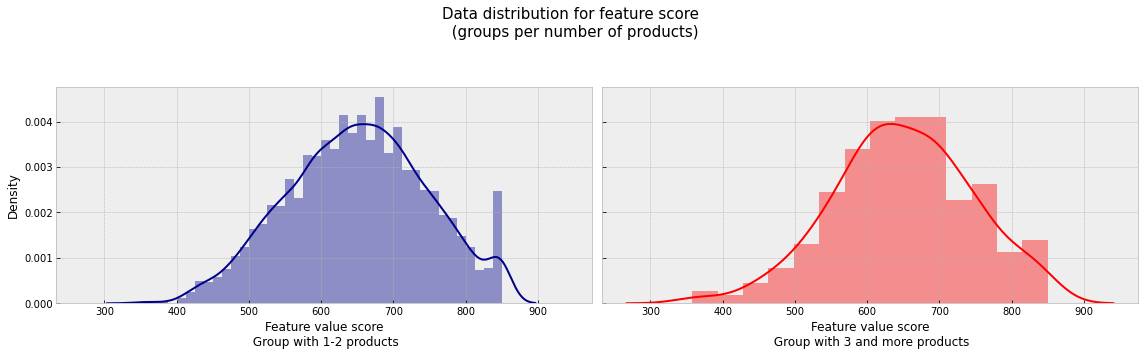

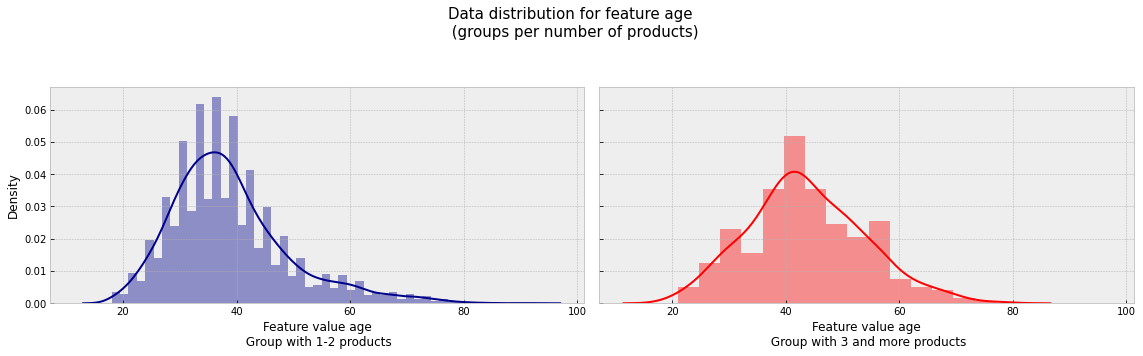

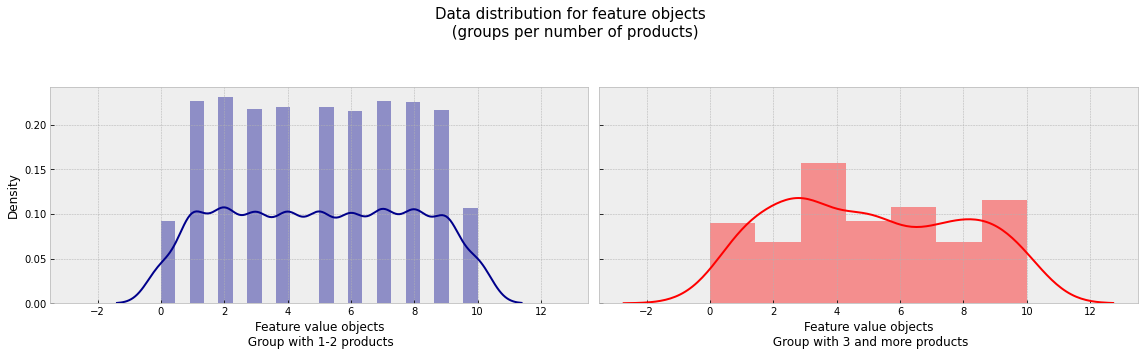

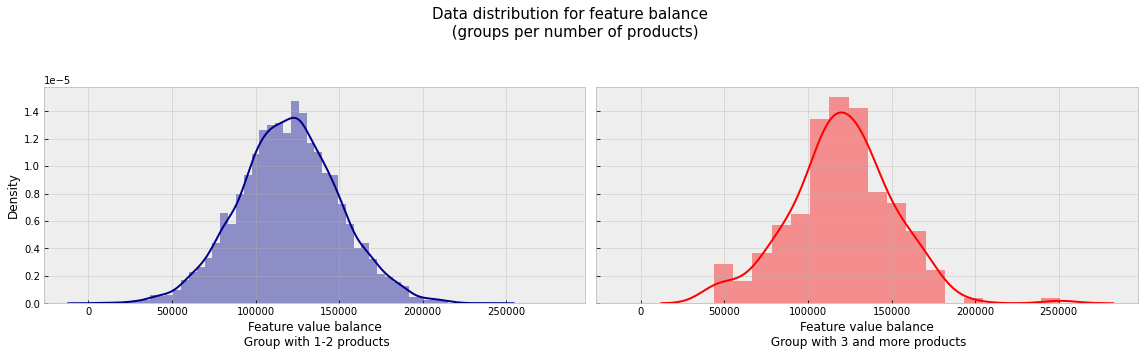

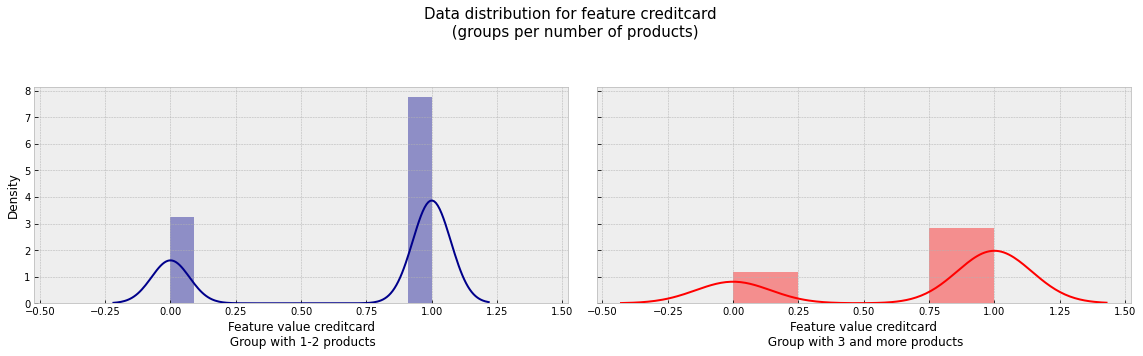

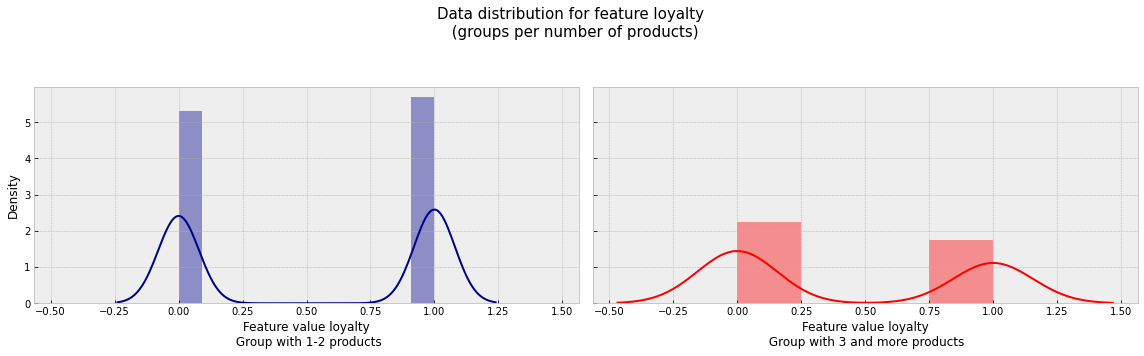

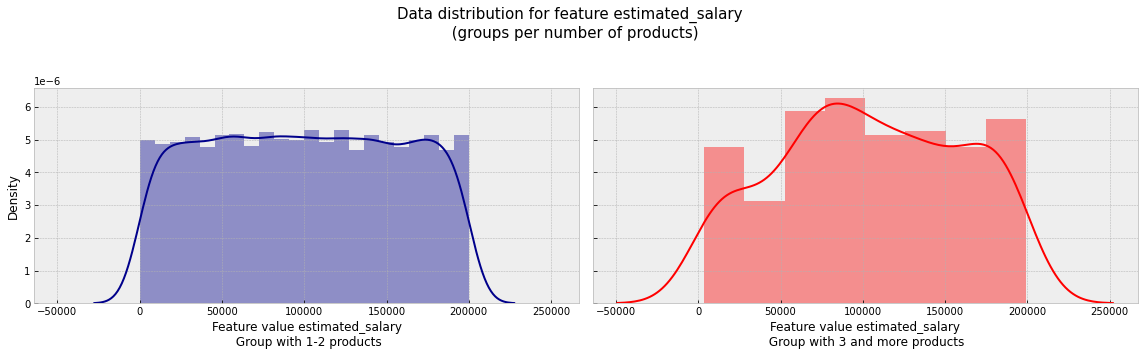

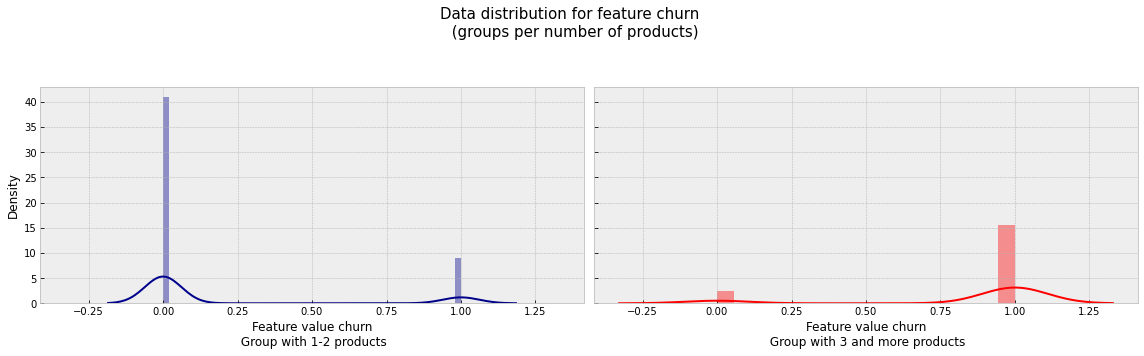

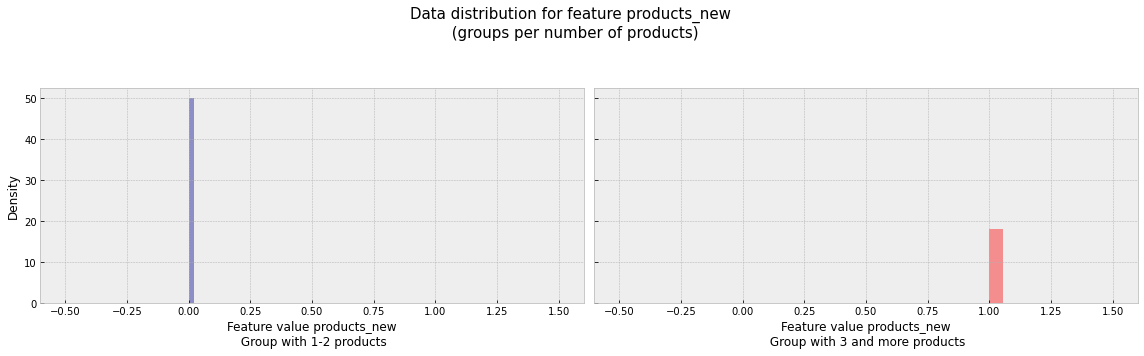

In [37]:
# Compare new groups
plt.style.use('bmh')
for column in data.drop(['userid','products', 'city', 'gender'],axis=1).columns:
    fig, ax = plt.subplots(1,2, figsize = (16,5),  tight_layout=True, sharey=True, sharex=True)
    #hist_range=(df[column].min(), df[column].max())
    sns.distplot(data.query('products_new == 0')[column].dropna(), hist=True, color='darkblue',ax = ax[0], norm_hist = True)
    sns.distplot(data.query('products_new == 1')[column].dropna(), hist=True, color='red',ax = ax[1], norm_hist = True)
    ax[0].set_title(' \n')
    ax[1].set_title(' \n')
    ax[0].set_xlabel('Feature value '+ str(column)+ '\n Group with 1-2 products')
    ax[1].set_xlabel('Feature value '+ str(column)+ '\n Group with 3 and more products')
    plt.suptitle('Data distribution for feature ' + column + ' '   + '\n (groups per number of products)', fontsize=15)
    plt.show()

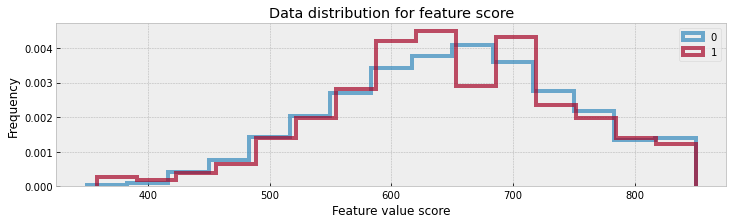

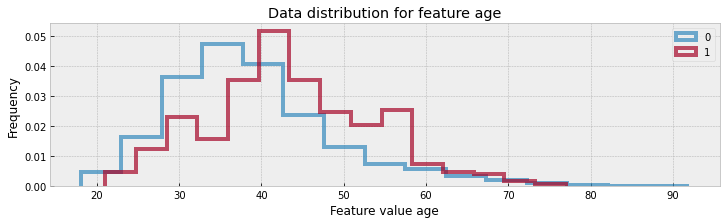

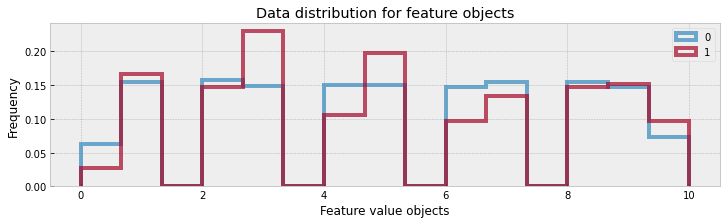

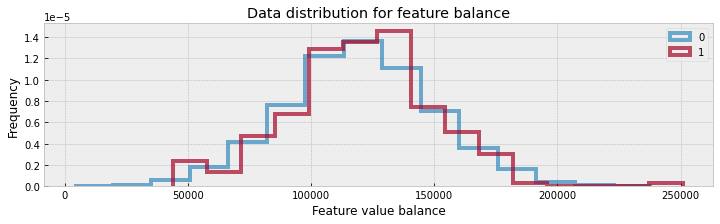

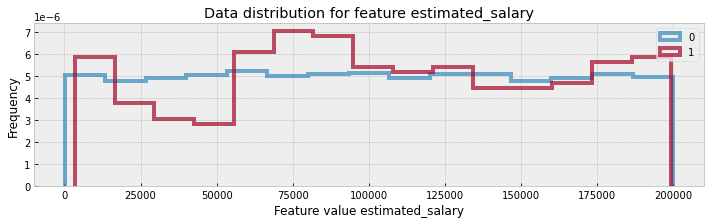

In [38]:
# We visualize the distribution for two groups by overlapping each other (with sample normalization parameter)
for column in data.drop(columns = ['userid', 'city', 'gender', 'creditcard', 'loyalty', 'churn','products', 'products_new']).columns:
    data.groupby('products_new')[column].plot(kind='hist', bins=15, figsize = (12,3), density =True, histtype='step', legend=True, alpha=0.7, linewidth=4, title='Data distribution for feature '+ str(column))  
    plt.xlabel('Feature value ' + column)
    plt.show()

* In general, even a comparison of two enlarged groups does not give very big differences
* There is a difference by age
* There are some differences in balance and estimated_salary, but they are not that significant

<a id="segmentation3"></a>
### 2.3. Analyze segments in relation to the churn factor. Draw conclusions about the propensity of segments to churn

Let's build histograms for all features in pairs - for each feature, histograms for remaining clients will be drawn in green on the left, histograms for left clients (those in the churn) will be drawn on the right in red.

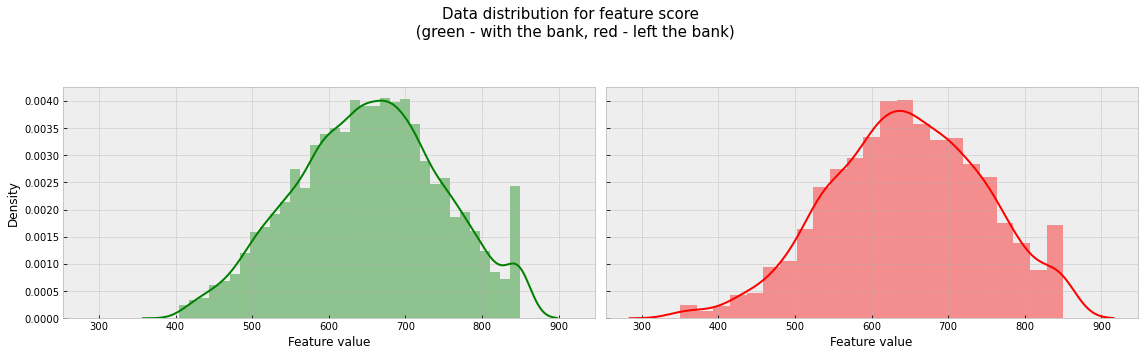

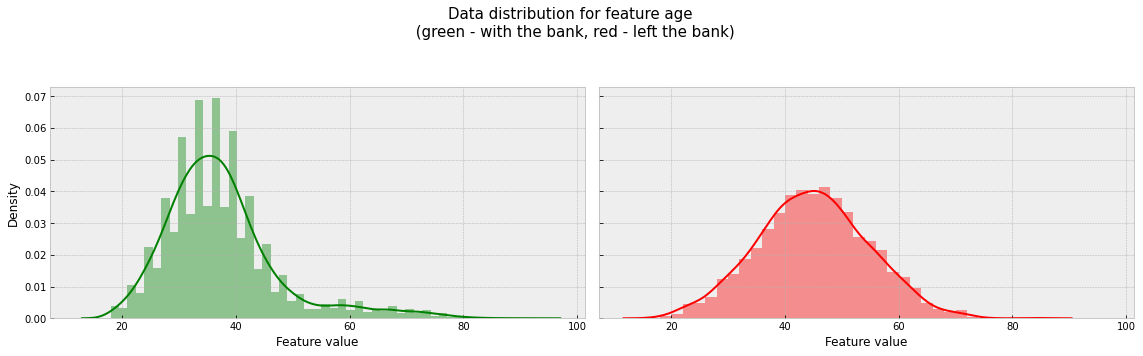

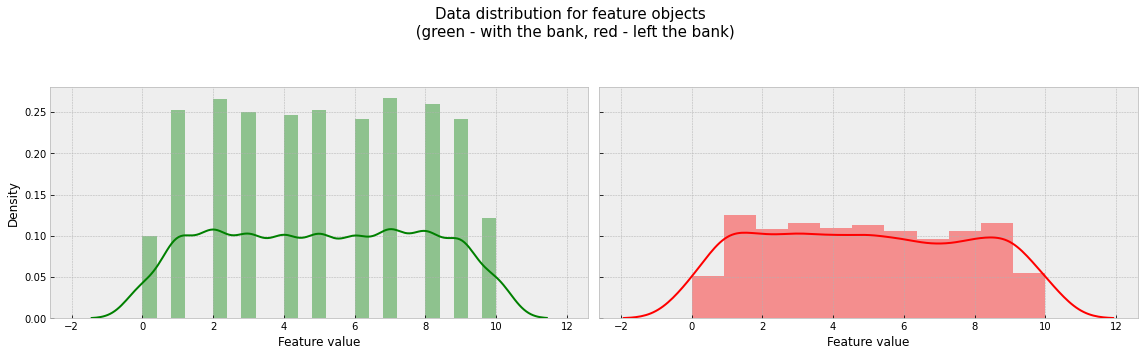

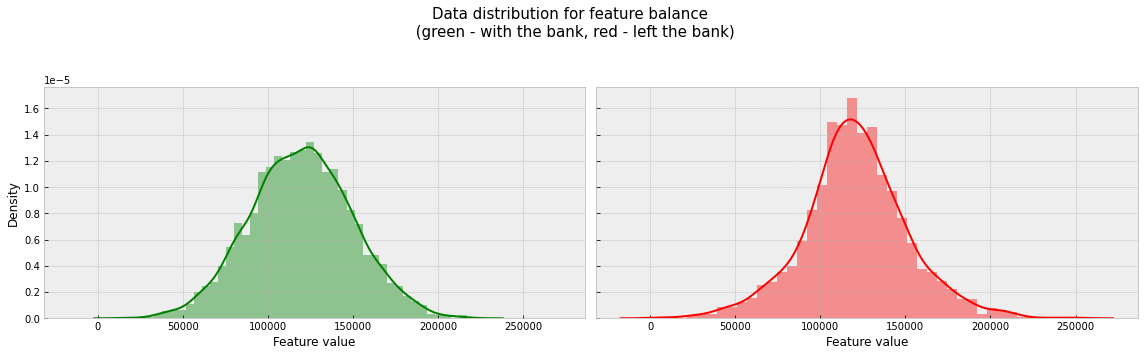

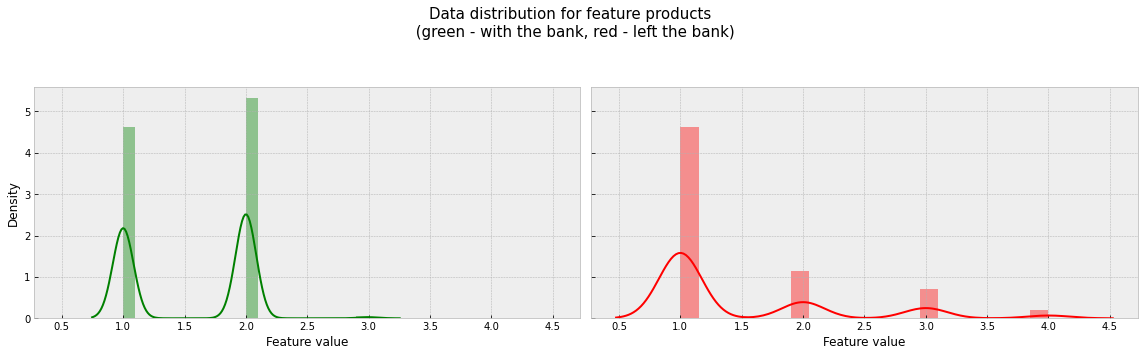

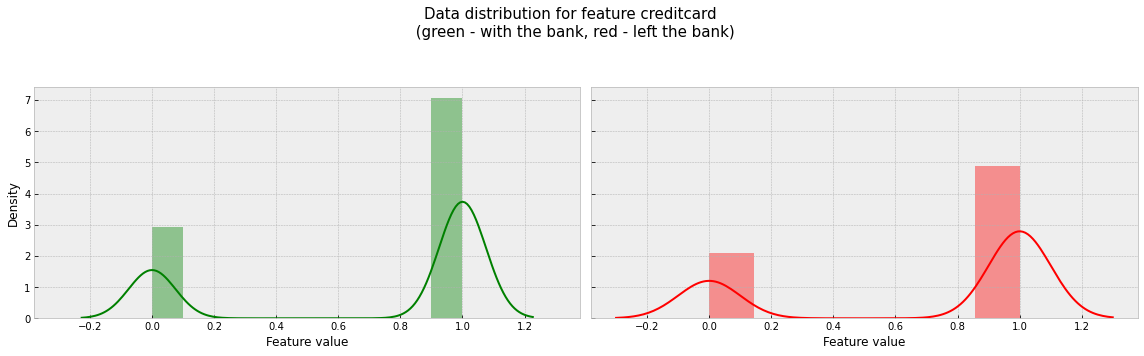

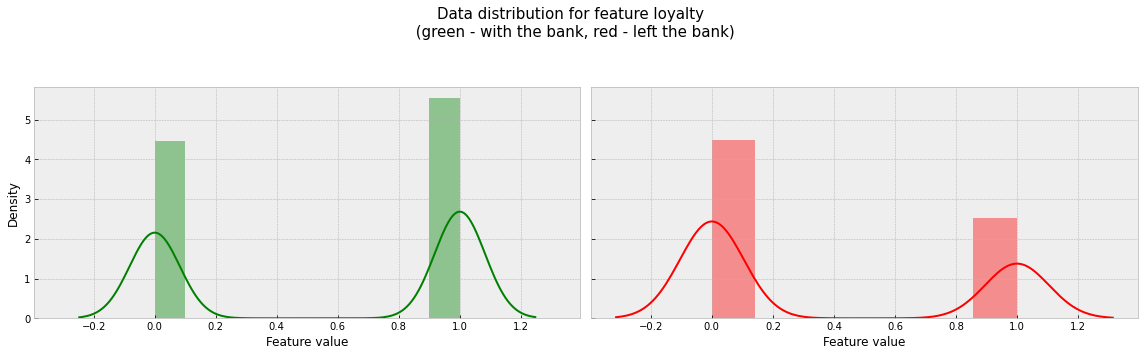

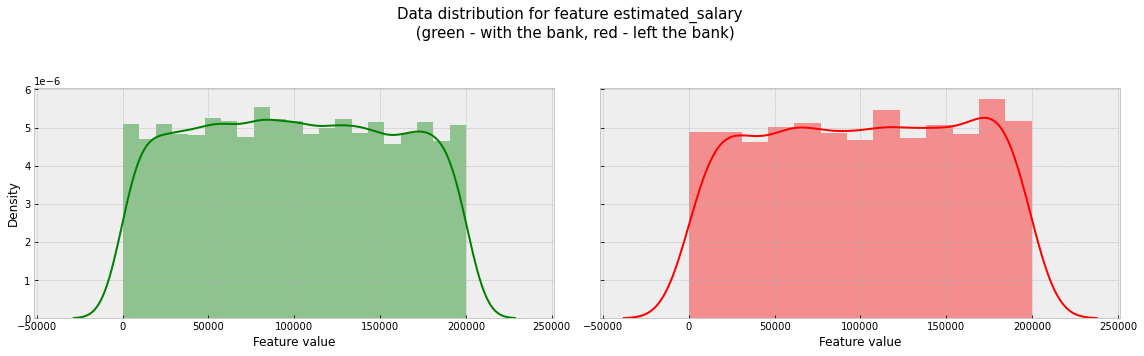

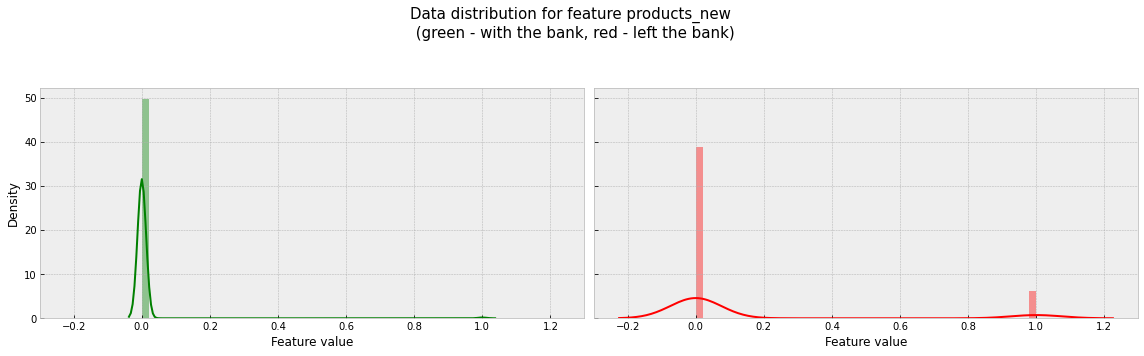

In [39]:
plt.style.use('bmh')
for column in data.drop(['churn', 'userid','city','gender'],axis=1).columns:
    fig, ax = plt.subplots(1,2, figsize = (16,5),  tight_layout=True, sharey=True, sharex=True)
    #hist_range=(df[column].min(), df[column].max())
    sns.distplot(data.query('churn == 0')[column].dropna(), hist=True, color='g',ax = ax[0], norm_hist = True)
    sns.distplot(data.query('churn == 1')[column].dropna(), hist=True, color='r',ax = ax[1], norm_hist = True)
    ax[0].set_title(' \n')
    ax[1].set_title(' \n')
    ax[0].set_xlabel('Feature value')
    ax[1].set_xlabel('Feature value')
    plt.suptitle('Data distribution for feature ' +  str(column) + ' ' +   '\n (green - with the bank, red - left the bank)', fontsize=15)
    plt.show()

* Older clients are leaving
* Clients with larger balances are leaving
* Of those who stayed with the bank, the largest number had less than 2 products

- Let's make another visualization with two samples overlaid on top of each other.
- We’ll leave the color coding the same: green for the sample of remaining clients (churn=0) and red for clients who left the bank (churn = 1)

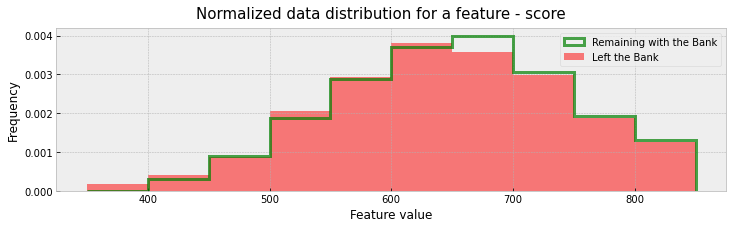

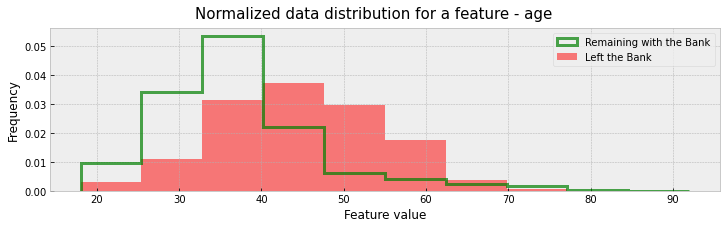

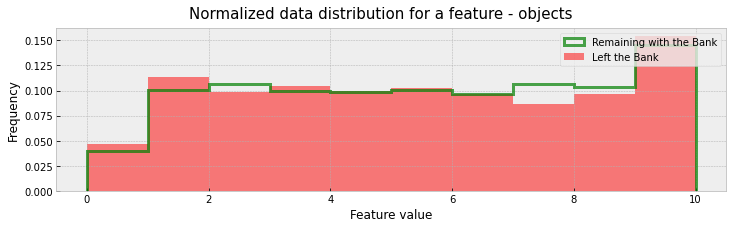

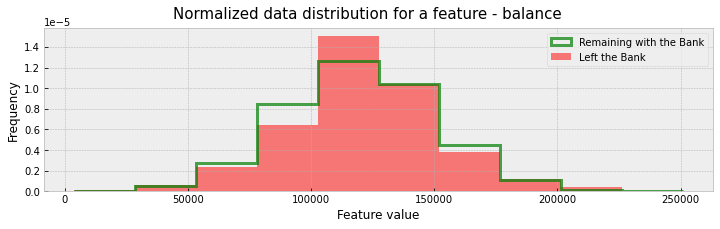

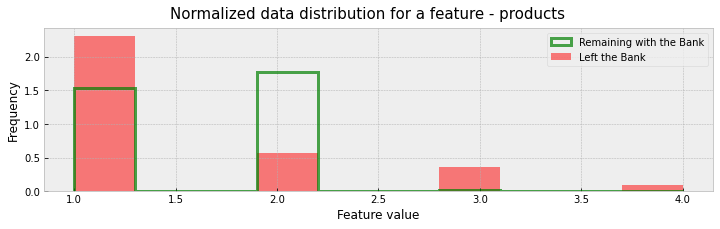

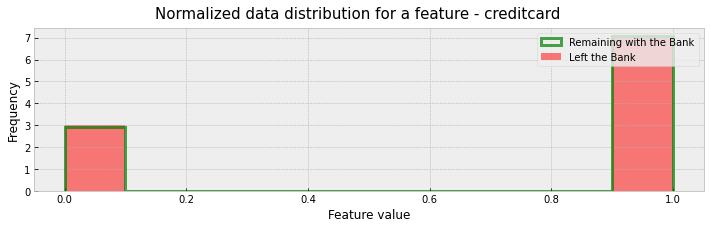

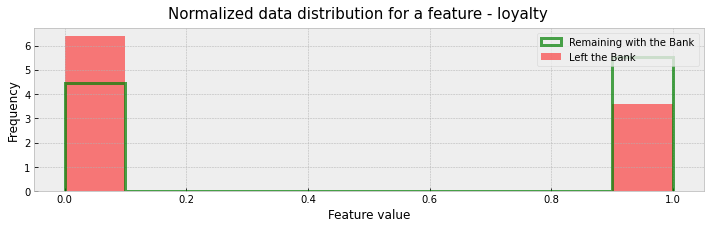

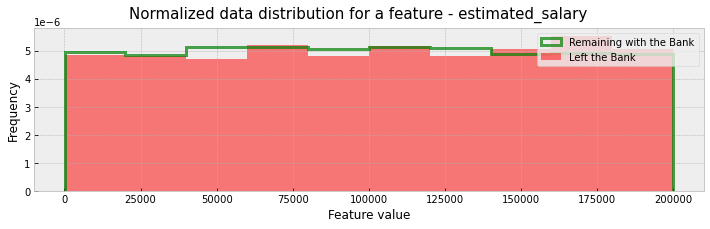

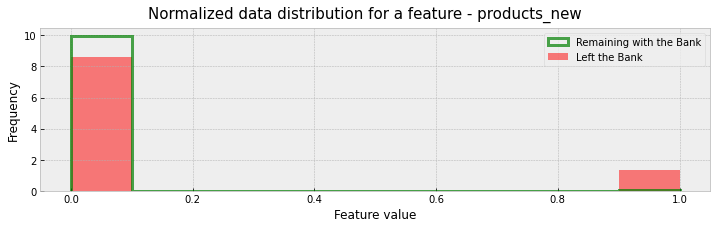

In [40]:
# We visualize by overlaying two samples on top of each other based on the churn attribute, 
# with the normalization attribute (density=True)
for column in data.drop(['churn', 'userid','city','gender'],axis=1).columns:
    hist_range=(data[column].min(), data[column].max())
    ax = data.query('churn == 0').plot(kind='hist', y=column, histtype='step', figsize = (10,3), density=True, range=hist_range, bins=10, linewidth=3, alpha=0.7, label='Remaining with the Bank', color='g')
    data.query('churn == 1').plot(kind='hist', y=column,figsize = (12,3), histtype='stepfilled', density=True, range= hist_range, bins=10, linewidth=2, alpha=0.5, label='Left the Bank', ax=ax, color='r', grid=True, legend=True)
    plt.xlabel('Feature value')
    plt.suptitle('Normalized data distribution for a feature - '+ str(column), fontsize=15)
    #bins=df[column].nunique()
    plt.show()

* In many respects we see that the distributions are almost identical
* The age difference is visible here too - among the clients who left, the age is higher (more selective?)
* Clients with 1 product often leave (not tied to the bank?)
* With 3 and 4 products, customers leave very often
* Repeat the graphs but without signs of normalization

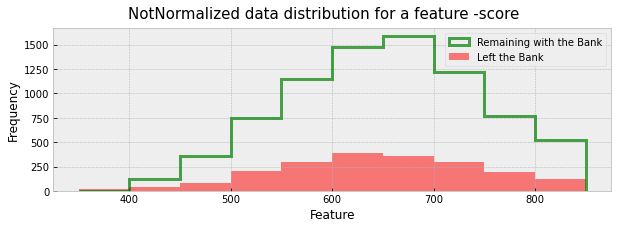

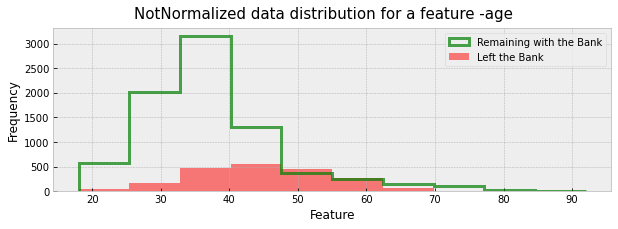

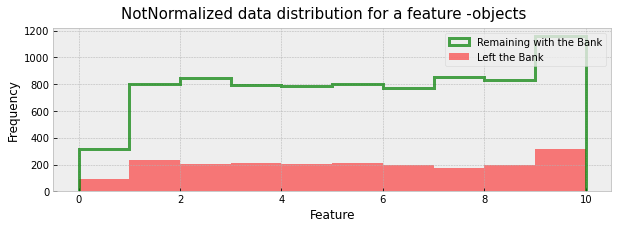

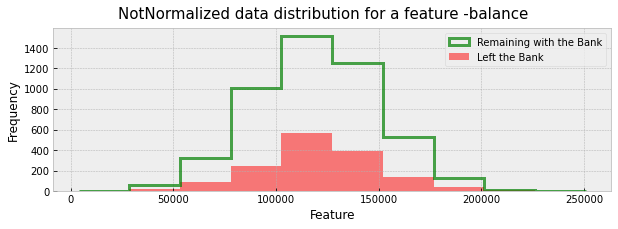

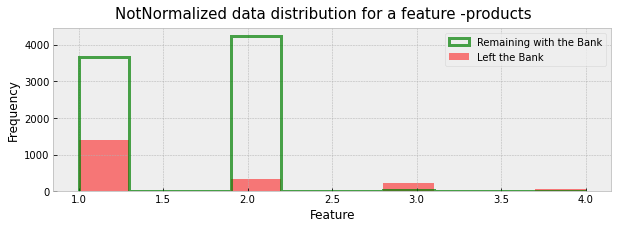

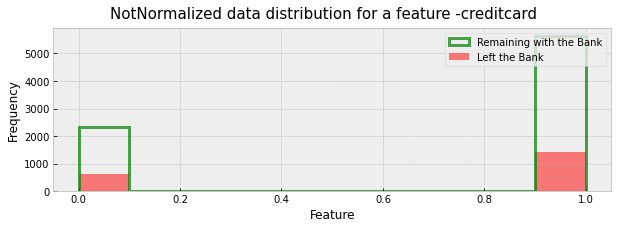

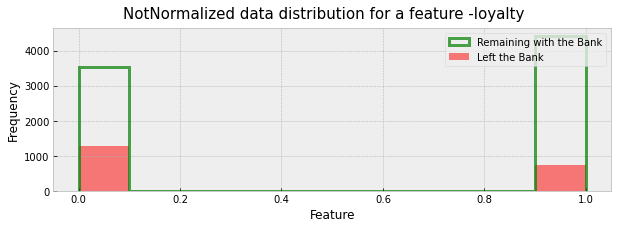

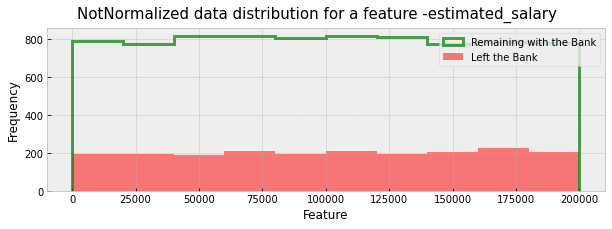

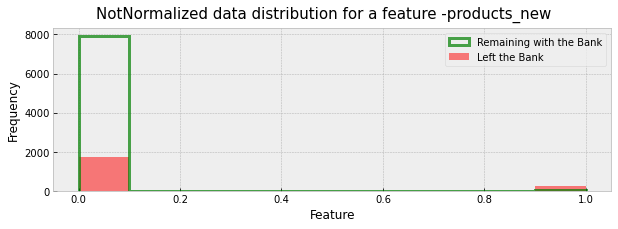

In [41]:
# For clarity, let’s draw graphs of the distribution of the main features with overlapping groups 
# based on the churn feature (density=false)
for column in data.drop(['userid','churn', 'city', 'gender'],axis=1).columns:
    hist_range=(data[column].min(), data[column].max())
    ax = data.query('churn == 0').plot(kind='hist', y=column, histtype='step', figsize = (10,3), range=hist_range, bins=10, linewidth=3, alpha=0.7, label='Remaining with the Bank', color='g')
    data.query('churn == 1').plot(kind='hist', y=column,figsize = (10,3), histtype='stepfilled', range= hist_range, bins=10, linewidth=2, alpha=0.5, label='Left the Bank', ax=ax, color='r', grid=True, legend=True)
    plt.xlabel('Feature')
    plt.suptitle('NotNormalized data distribution for a feature -'+ str(column), fontsize=15)
    #bins=df[column].nunique()
    plt.show()

* Let's do an additional visual analysis of binary features by constructing a countplot (by churn)

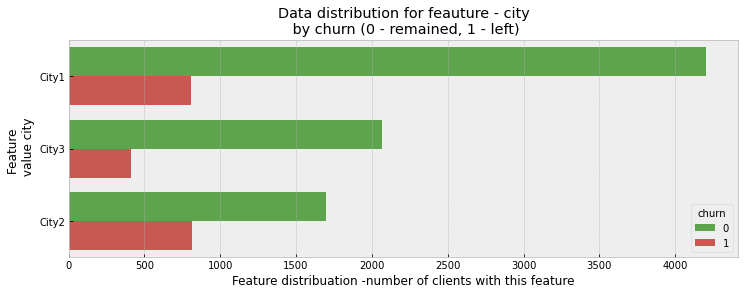

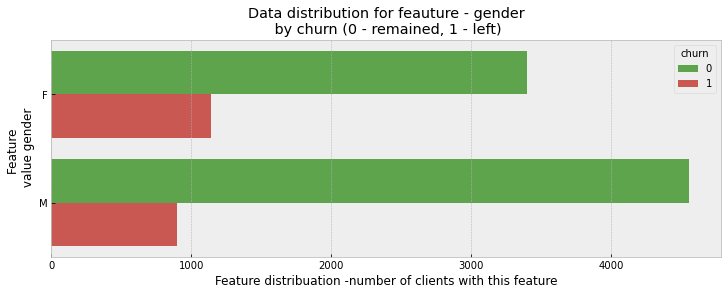

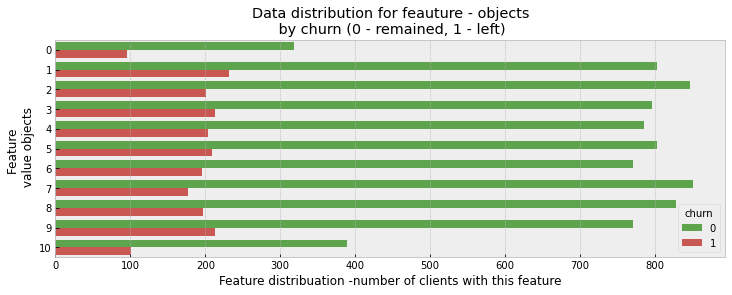

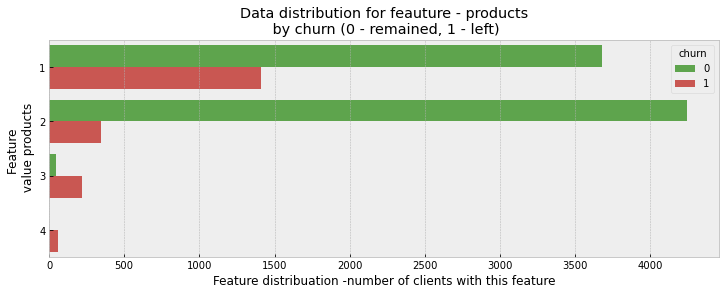

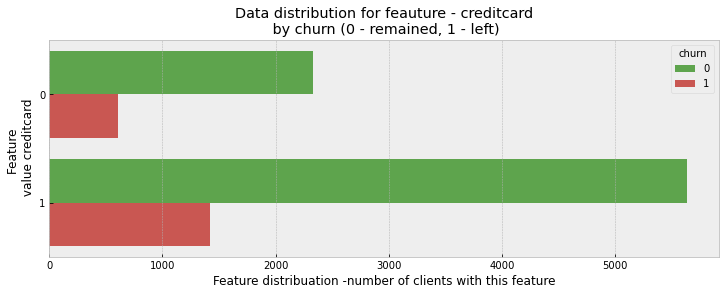

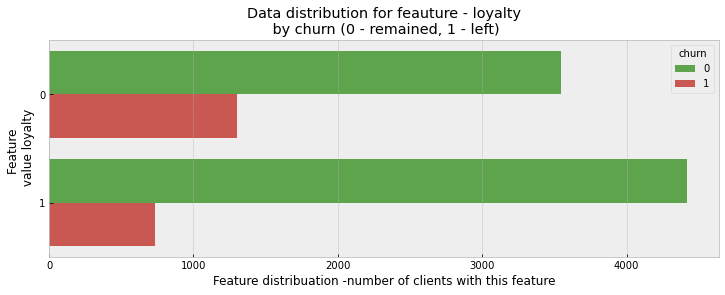

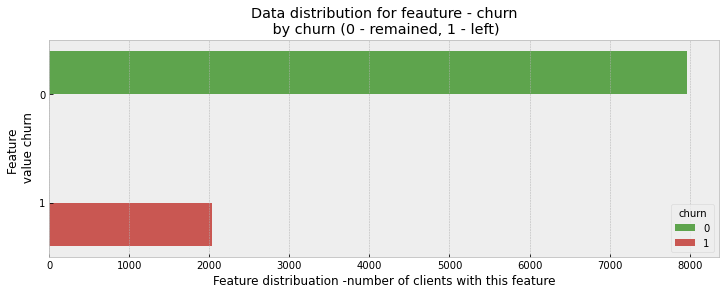

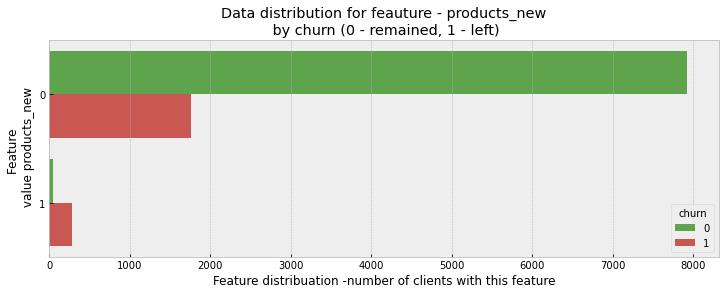

In [42]:
for column in data.drop(columns = ['userid', 'score', 'age', 'balance', 'estimated_salary']).columns:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.countplot(y=column, hue='churn', data=data, ax=ax, saturation=0.8, palette=['#58AF42',"#D84943"], orient ='h')
    plt.title('Data distribution for feauture - '+ str(column) + '\n by churn (0 - remained, 1 - left)')
    plt.xlabel('Feature distribuation -number of clients with this feature')
    plt.ylabel('Feature \n value ' + str(column))
    plt.show()

* Information is confirmed that outflow/churn in City2 requires careful analysis and actions
* Women are more likely to leave the bank than men
* Overall, 2 thousand out of 10 thousand clients are currently experiencing inactivity (left the bank)
* And we confirm the information:
     - that customers with 2 products are least likely to leave the bank
     - clients with 1 product have a large share of churn (they are not sufficiently attached or do not understand the advantages and products of our bank)
     - clients with 3 products tend to leave the bank (their share is growing)
     - customers with 4 products are currently all in churn (leaving the bank)

* Let's do an additional visual analysis of continuous and discrete features through the boxplots (by churn)

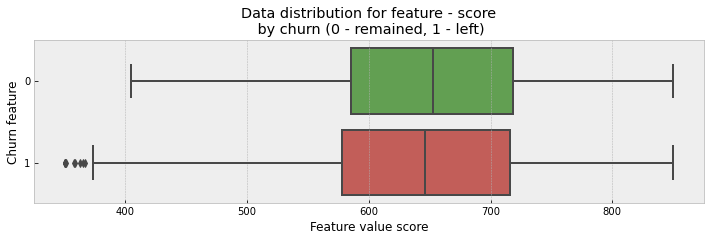

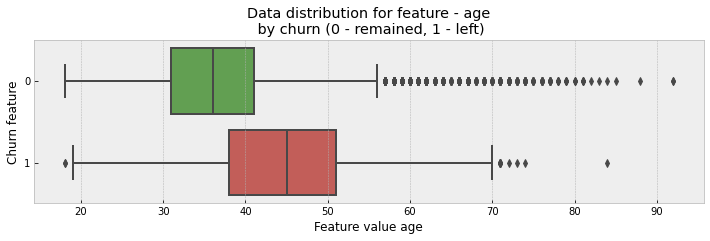

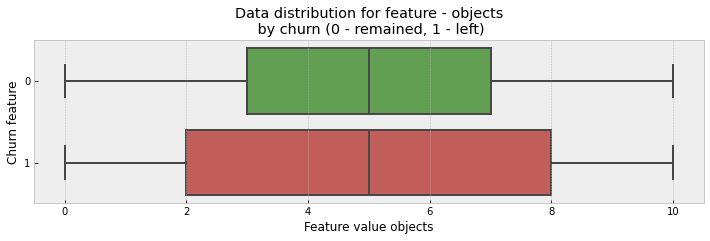

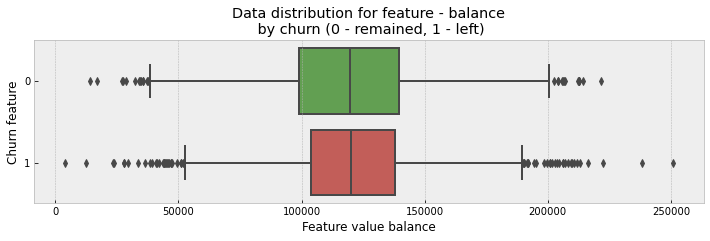

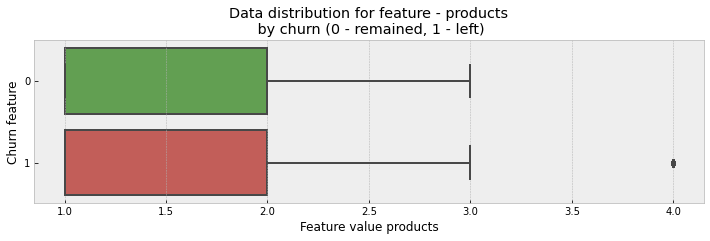

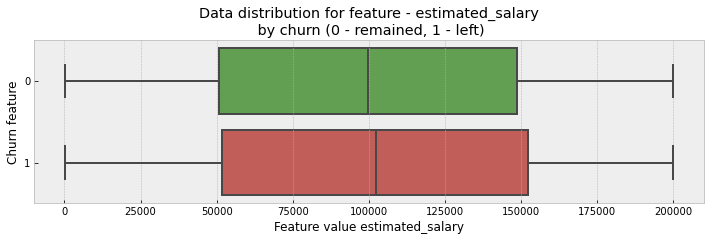

In [43]:
for column in data.drop(columns =  ['userid','city', 'gender', 'creditcard', 'loyalty', 'churn', 'products_new']).columns:
    fig,ax = plt.subplots(figsize=(12,3))
    ax=sns.boxplot(data[column], data.churn, ax=ax,  orient='h', saturation=0.7, palette=['#58AF42',"#D84943"])
    plt.title('Data distribution for feature - '+ str(column) + '\n by churn (0 - remained, 1 - left)')
    plt.ylabel('Churn feature', fontsize=12)
    plt.xlabel('Feature value ' + column)
    plt.show()

* there are no obvious differences in score, but it has been noticed that among those who left there are more clients with lower ratings
* there are significant differences by age:
     - among those who left, the average age is noticeably higher (the difference is about 10 years)
     - among the remaining clients it was also noticed that there are a large number of very elderly clients
* in terms of the number of properties owned, on average the indicators are equal, but there is a noticeable difference: in the outflow group there are more clients either with a very small number of properties or with a large number of properties
* according to the estimated_salary criterion, the distribution is absolutely identical, which raises some doubts and perhaps the algorithm for calculating this indicator can be revised and optimized
* based on the availability of products in use between the groups of remaining and churners, there is no difference in the distribution of data, but for the group of churners there are outliers at the level of availability of 4 products (we said that all of them went into churn)
* on the basis of balance, on average, the indicators are the same between the groups of leavers/remainers, but among the leavers there is a greater spread of values both in one direction and in the other (the situation is similar to the presence of objects in the property). This means that here, at a minimum, it is necessary to divide into two strategies - working with less affluent clients and working with more affluent ones. The retention methods for group 1 and group 2 (in the screenshot) will be different:
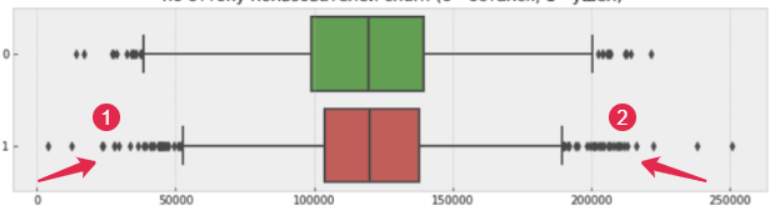

<a id="segmentation4"></a>
### 2.4. Describe a portrait of a typical client for each segment

* To describe the portrait of a typical client in each of the selected segments, we will use a grouping table (we will retain the original number of products)

In [44]:
data.drop('userid', axis=1).groupby('products').mean().round(1)

score   age  objects   balance  creditcard  loyalty  \
products                                                        
1         649.1  39.7  5.0      119894.2  0.7         0.5       
2         652.2  37.8  5.1      119660.9  0.7         0.5       
3         648.1  43.2  5.0      119475.7  0.7         0.4       
4         653.6  45.7  5.3      122260.6  0.7         0.5       

          estimated_salary  churn  products_new  
products                                         
1         99487.3           0.3    0.0           
2         100452.0          0.1    0.0           
3         104318.1          0.8    1.0           
4         104763.7          1.0    1.0

**Typical Customer with 1 Product** has the following characteristics:
   - average rating about 650 units
   - average age 40 years
   - on average owns 5 properties
   - average balance 120 thousand
   - 7 out of 10 use a credit card from our bank
   - every second person is an active client
   - average salary (estimated_salary) is 99.5 thousand
   - every third client (30%) is in churn

**Typical Customer with 2 Products** has the following characteristics:
   - average rating is just over 650 units
   - average age 38 years
   - on average owns 5 properties
   - average balance 120 thousand
   - 7 out of 10 use a credit card from our bank
   - every second person is an active client
   - average salary (estimated_salary) is 100.5 thousand
   - every tenth client (10%) is in churn!
     
**Typical Customer with 3 Products** has the following characteristics:
   - average rating about 650 units
   - average age 43 years
   - on average owns 5 properties
   - average balance 120 thousand
   - 7 out of 10 use a credit card from our bank
   - almost every second person is an active client
   - average salary (estimated_salary) is 104 thousand
   - 8 out of 10 clients (80%) are in churn!
     
**Typical Customer with 4 Products** has the following characteristics:
   - average rating 654 units
   - average age 46 years
   - on average owns more than 5 properties
   - average balance 122 thousand
   - 7 out of 10 use a credit card from our bank
   - every second person is an active client
   - average salary (estimated_salary) is 105 thousand
   - all clients (100%) are in churn

<a id="hypothesis"></a>
## 3. Statistical hypothesis testing

**Task 1.** Test the hypothesis that there are differences in the income of those clients who use two bank products and those who use one

Let's form a hypothesis:

* H0 = the average income of customers with 1 product is equal to the average income of customers with 2 products
* H1 = The average income of customers with 1 product is different from the average income of customers with 2 products

In this problem, it is not entirely clear what is meant by customer income. We will take into account such indicators, because they all show the client's income:
     - estimated_salary
     - balance
     - score

We will use the Student's test and conduct a t-test
We will use the approach of formulating a hypothesis about the equality of the means of two general populations

We have two samples, their variance is different, so we will also set the parameter equal_var = False
We set the critical level of statistical significance as 0.05 (5%)

In [45]:
data.head(1)

userid  score   city gender  age  objects  balance  products  creditcard  \
0  15677338  619    City1  F      42   2       NaN       1         1            

   loyalty  estimated_salary  churn  products_new  
0  1        101348.88         1      0

In [46]:
# Create summary tables for analysis
data1 = data.query('products==1')['estimated_salary']
data2 = data.query('products==2')['estimated_salary']

In [47]:
alpha = 0.05
test_results = st.ttest_ind(data1,  data2, equal_var = False) 
test_results.pvalue
if test_results.pvalue < alpha:
    print('Reject the null hypothesis -', 'pvalue:', test_results.pvalue)
else:
    print('Could not reject the null hypothesis -', test_results.pvalue)

Could not reject the null hypothesis - 0.4106493940071987


In [48]:
# We confirm the same by calculation, these means are equal
data.query('products==1')['estimated_salary'].mean() #99487.26
data.query('products==2')['estimated_salary'].mean() #100452.01

100452.01282135084

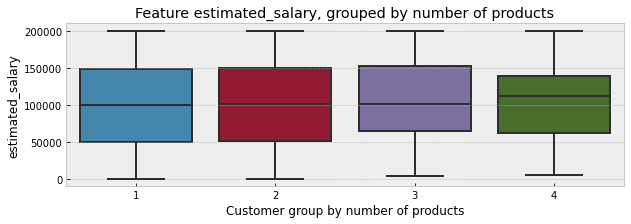

In [49]:
# Visualizing information about estimated_salary by groups
plt.figure(figsize = (10,3))
ax = sns.boxplot(x='products', y='estimated_salary', data=data)
plt.title('Feature estimated_salary, grouped by number of products')
plt.ylabel('estimated_salary')
plt.xlabel('Customer group by number of products')
plt.show()

**Conclusion:**
* The probability of getting equal means estimated_salary is 0.41, which means we cannot reject the null hypothesis
* We confirmed the same fact through calculations
* Average estimated salaries (estimated_salary) for customer groups with 1 and 2 products are equal
* Visualization on the graph also clearly emphasizes the statement

In [50]:
# Create pivot tables for balance analysis
balance1 = data.query('products == 1')['balance'].dropna()
balance2 = data.query('products == 2')['balance'].dropna()

In [51]:
alpha = 0.05
test_results = st.ttest_ind(balance1,  balance2, equal_var = False) 
test_results.pvalue
if test_results.pvalue < alpha:
    print('Reject the null hypothesis -', 'pvalue:', test_results.pvalue)
else:
    print('Could not reject the null hypothesis -', test_results.pvalue)

Could not reject the null hypothesis - 0.7780519890816037


In [52]:
# We confirm the same by calculation, these means are equal
data.query('products == 1')['balance'].mean() #119894.16
data.query('products == 2')['balance'].mean() #119660.94

119660.94436180912

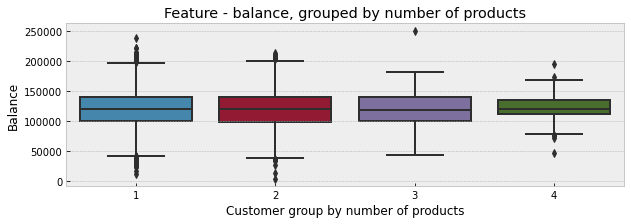

In [53]:
plt.figure(figsize = (10,3))
ax = sns.boxplot(x='products', y='balance', data=data.query('balance != 0.01'))
plt.title('Feature - balance, grouped by number of products')
plt.ylabel('Balance')
plt.xlabel('Customer group by number of products')
plt.show()

**Conclusion:**
* The probability of getting equal average balance is 0.78, which means that we cannot reject the null hypothesis
* We confirmed the same fact through calculations
* Average account balances for groups of clients with 1 and 2 products are equal
* Visualization on the graph also clearly emphasizes the statement

In [54]:
# The same for score
score1 = data.query('products == 1')['score']
score2 = data.query('products == 2')['score']

In [55]:
alpha = 0.05
test_results = st.ttest_ind(score1,  score2, equal_var = False) 
test_results.pvalue
if test_results.pvalue < alpha:
    print('Reject the null hypothesis -', 'pvalue:', test_results.pvalue)
else:
    print('Could not reject the null hypothesis -', test_results.pvalue)

Could not reject the null hypothesis - 0.11889293846062188


In [56]:
# We confirm the same by calculation, these means are equal
data.query('products == 1')['score'].mean() #649.12
data.query('products == 2')['score'].mean() #652.19

652.1886710239652

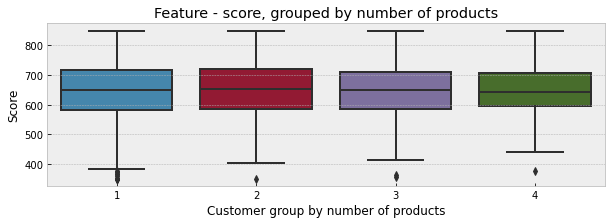

In [57]:
plt.figure(figsize = (10,3))
ax = sns.boxplot(x='products', y='score', data=data)
plt.title('Feature - score, grouped by number of products')
plt.ylabel('Score')
plt.xlabel('Customer group by number of products')
plt.show()

**Conclusion:**
* And here the general averages of two samples (a group of customers with 1 product and with 2 products) are equal. We cannot reject the null hypothesis
* We confirmed the same fact through calculations of averages
* Average scores for customer groups with 1 and 2 products are equal
* Visualization on the graph also clearly emphasizes the statement

* So, the hypothesis H0, analyzed from three different sides, cannot be rejected.
* There is no difference in the income of customers with 1 product and customers with 2 products; their income, analyzed based on available data, is equal

<a id="conclusion"></a>
## 4. Conclusions and basic recommendations for working with segments
* Form the main conclusions and offer recommendations for the strategy of interaction with users in various segments

Consolidation of groups did not give a good result, so recommendations will be given for groups formed based on initial information about the availability of products. Thus, we have 4 groups and the portrait of a typical client for each group was given above
* **Recommendations for a group of customers with 1 product:**
     - these clients are not tied to the bank. Most likely, they do not know about other products or do not understand their benefits. In this regard, it is necessary to inform customers about the availability of products and their features/benefits
     - many clients leave (30%) and go to other banks precisely because of better awareness of the products of competing banks. Questionnaire, analyze the reasons for leaving and try to influence in order to prevent outflow
     - actively disseminate information about products for middle-aged people (family, children's packages)
* **Recommendations for a group of customers with 2 products:**
     - the most stable segment in terms of outflow. Need to keep/maintain loyalty from this group.
     - the main goal is to make sure that the two products used fully satisfy the client's needs and they do not plan to change them and they do not need to cover other needs. Collection of information and feedback
     - it is recommended not to sell additional products at this level, but first of all to maintain attachment to the bank, customer loyalty through psychological methods - a sense of belonging, values, features, the ability to solve all problems directly with the bank/personal manager  and very quickly, etc.
     - various bonus systems can work well (via other partner companies)
     - before selling new products, need to identify the reasons for the increased churn of customers with more than 2 products (see below)
* **Recommendations for a group of customers with 3 products:**
     - a problematic sector and a candidate for complete outflow in the short term
     - It is recommended to analyze the structure of products and understand which product leads to outflow. Perhaps this is lending and clients are moving to other banks for better conditions or simply for the purpose of refinancing. Develop personalized measures to change the conditions for such clients
     - This is the older age segment. Analyze their needs using unobtrusive questionnaires. Perhaps one of the reasons for leaving is the selectivity of clients and the desire to find more special and favorable conditions
     - bonus schemas, affiliate programs can also work here, but especially well can retain methods of involvement in something big, a sense of importance and exclusivity in general, and for the bank in particular
     - monitor the change in % of outflow over time
     - a thorough analysis of the outflow of this group separately by city, in particular by City2
* **Recommendations for a group of customers with 4 products:**
     - all clients of this group are currently experiencing churn (left the bank)
     - take into account all the measures described for the previous group. They will work
     - the age of this group is even older and, apparently, clients are even more selective and easily switch to competing banks with better conditions
     - all the indicators of this group are higher than those of others and it is in the interests of the bank to understand the dynamics and causes of outflow, as well as answer all the questions asked for the third group

<a id="clustering"></a>
### 5. Additional analysis - ML customer clustering

<a id="clustering1"></a>
### 5.1. Perform clustering using the K-means method
See if ML clustering gives us any additional information

In [58]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.metrics import roc_auc_score

In [59]:
data.head()

userid  score   city gender  age  objects    balance  products  \
0  15677338  619    City1  F      42   2       NaN         1          
1  15690047  608    City3  F      41   1        83807.86   1          
2  15662040  502    City1  F      42   8        159660.80  3          
3  15744090  699    City1  F      39   1       NaN         2          
4  15780624  850    City3  F      43   2        125510.82  1          

   creditcard  loyalty  estimated_salary  churn  products_new  
0  1           1        101348.88         1      0             
1  0           1        112542.58         0      0             
2  1           0        113931.57         1      1             
3  0           0        93826.63          0      0             
4  1           1        79084.10          0      0

* At this step we will need to “digitize” the categorical variables:
     - Gender (M=0, F=1)
     - City (City1= 1, City2 =2, City3=3)
     - Place a marker for missing balance values

In [60]:
# Before transformation
data['gender'].value_counts()

M    5457
F    4543
Name: gender, dtype: int64

In [61]:
# Change
data.loc[(data['gender'] == 'M'), 'gender'] = 0
data.loc[(data['gender'] == 'F'), 'gender'] = 1

In [62]:
# Results
data['gender'].value_counts()

0    5457
1    4543
Name: gender, dtype: int64

In [63]:
data['gender'] = data['gender'].astype(int)

In [64]:
# Before transformation
data['city'].value_counts()

City1    5014
City2    2509
City3    2477
Name: city, dtype: int64

In [65]:
# Change
data.loc[(data['city'] == 'City1'), 'city'] = 1
data.loc[(data['city'] == 'City2'), 'city'] = 2
data.loc[(data['city'] == 'City3'), 'city'] = 3

In [66]:
data['city'] = data['city'].astype(int)

In [67]:
# Results
data['city'].value_counts()

1    5014
2    2509
3    2477
Name: city, dtype: int64

In [68]:
# Replace  NaN to the marker value 0.01 in balance
data['balance'].fillna(0.01, inplace=True)

In [69]:
# Divide the sample into train and test in the proportion of 80% and 20%
X = data.drop(['churn'], axis = 1)
y = data['churn']

# divide the model into a training and validation set
# additionally use the stratify = y parameter to balance classes in samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


# Standardize data on this step to get more accurate results
# train StandardScaler on the training set
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming training and validation data sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [70]:
# Check the total number of records in the training and test samples
#len(X_train_st)+len(X_test_st)
#len(X_train)+len(X_test)
len(y_train)+len(y_test)

10000

In [71]:
sc = StandardScaler()
X_sc = sc.fit_transform(X) # 

In [72]:
# Import method KMeans
from sklearn.cluster import KMeans

In [73]:
# Take the number of clusters equal to 3 for calculations and then explain in more detail why this is so
km = KMeans(n_clusters = 3,  random_state = 0) 
labels = km.fit_predict(X_sc) # apply the algorithm to the data and form a vector of clusters

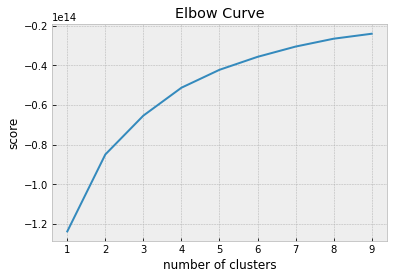

In [74]:
# Use the method of calculating the optimal number of clusters
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.show()

* The curve shows that the optimal number of clusters is 2-3

In [75]:
# Import the methods necessary for constructing a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_sc, method = 'ward')

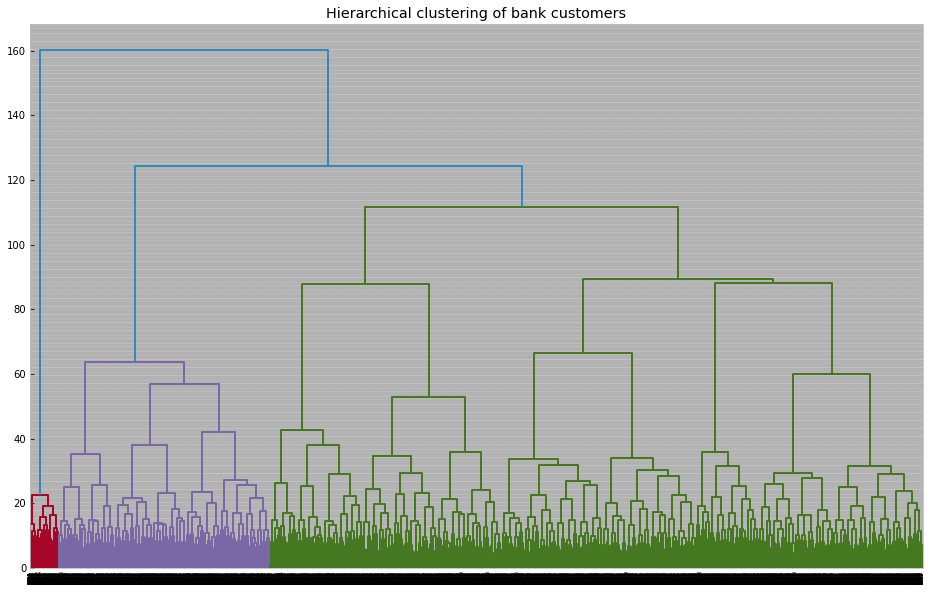

In [76]:
# Build dendrogram
plt.figure(figsize=(16, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering of bank customers')
plt.xlabel(' ')
plt.show()

* Dendrogram suggests 3 clusters

In [77]:
# Save the cluster labels in a new field of our dataset
data['cluster'] = labels

<a id="clustering2"></a>
### 5.2. Analyze the proposed clusters based on average values, construct feature distributions for the clusters

In [78]:
# See the size of groups/clusters
data.groupby('cluster').size()

cluster
0    5896
1    3778
2    326 
dtype: int64

In [79]:
# Display statistics on the average values of our features for the cluster
data.drop('userid', axis=1).groupby('cluster').mean().round(2)

score  city  gender    age  objects    balance  products  \
cluster                                                              
0        651.29  1.80  0.45    39.15  4.97     122279.00  1.30       
1        649.47  1.66  0.46    38.16  5.08     4818.96    1.75       
2        649.11  1.82  0.57    43.65  5.06     78821.79   3.18       

         creditcard  loyalty  estimated_salary  churn  products_new  
cluster                                                              
0        0.70        0.52     100508.48         0.22   0.0           
1        0.71        0.52     99065.63          0.12   0.0           
2        0.71        0.44     104400.14         0.86   1.0

* Calculated simple means do not provide quick, bright insights and need to be visualized
* Quick analysis is also difficult due to the fact that some of the variables are binary, discrete, and some are continuous
* The difference between clusters is highlighted based on the characteristics of products, churn, as well as on a territorial basis (city)

* Let's break down the features into comparable types and build separate heat maps for these groups
* For clarity, we will include churn in all heat maps
* **Please note that the sorting is done not by cluster numbers, but by the average cluster Churn rate (since this is one of the most key indicators), in ascending order (the top line is the best cluster by churn/lowest customer churn)**

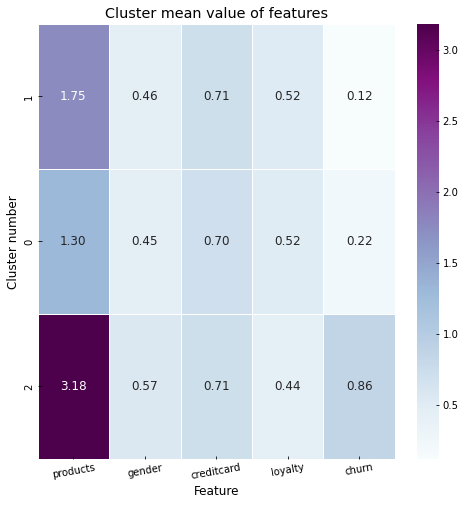

In [80]:
# Visualize some means by clusters using a heat map
plt.figure(figsize = (8,8))
sns.heatmap(data=data.groupby('cluster')['products', 'gender','creditcard','loyalty', 'churn'].mean()\
            .sort_values(by='churn'), annot = True, linewidths=1, linecolor='white',cmap="BuPu"\
            ,fmt='.2f', annot_kws={"size": 12})
plt.xticks(rotation=10) 
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

* The number of products by cluster differs significantly: in cluster 0 it is minimal (1.3 per client), and in cluster 2 it is maximum (3.2 products)
* Gender does not play a big role - but in cluster 2 there are slightly more women
* The outflow/churn is maximum in cluster 2 (with the maximum number of products!) and it is equal to 86%.
* Churn is minimal in cluster 1 (1.8 products per 1 client) and is equal to 12%
* For clarity, the rightmost column reflects the churn rate in each cluster
* The relationship between the number of products and outflow is confirmed here: the most stable clients have 2 products

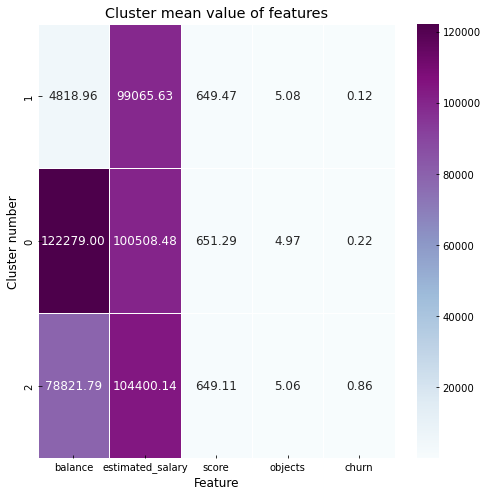

In [81]:
# Visualize some means by clusters using a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(data=data.groupby('cluster')['balance','estimated_salary', 'score', 'objects','churn'].mean().sort_values(by='churn'), annot = True, linewidths=1, linecolor='white',cmap="BuPu", fmt='.2f',  annot_kws={"size": 12})
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

* A striking difference of cluster 1 in terms of balance is that it is quite low and on average is about 5000. However, the average expected income of this cluster is the same as that of other groups - about 100 thousand. A sleeping cluster, it needs to be woken up.
* Cluster 2 has an average balance of about 80 thousand and the outflow for these clients is maximum (86%)
* Cluster 0 looks profitable - on average 1.3 products per person, good average balance and income and low churn (22%). This cluster needs to be encouraged, developed and retained

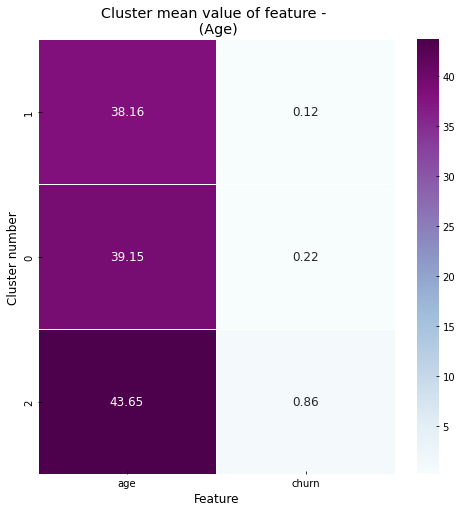

In [82]:
# Age analysis
plt.figure(figsize = (8,8))
sns.heatmap(data=data.groupby('cluster')['age','churn'].mean().sort_values(by='churn'), annot = True, linewidths=1, linecolor='white',cmap="BuPu", fmt='.2f', annot_kws={"size": 12})
plt.title('Cluster mean value of feature - \n (Age)')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

* Cluster 2 is the oldest - average age is 44 years, the rest are about 40 on average there are no big differences

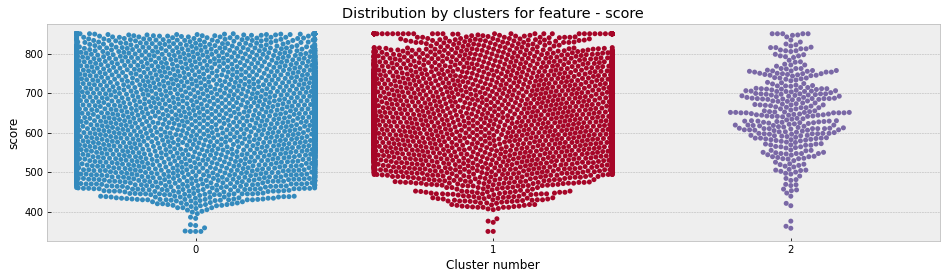

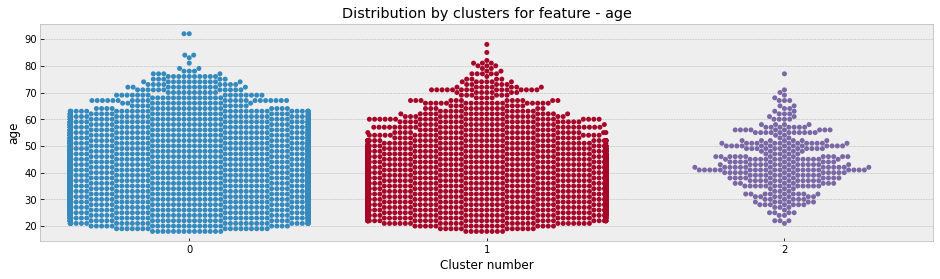

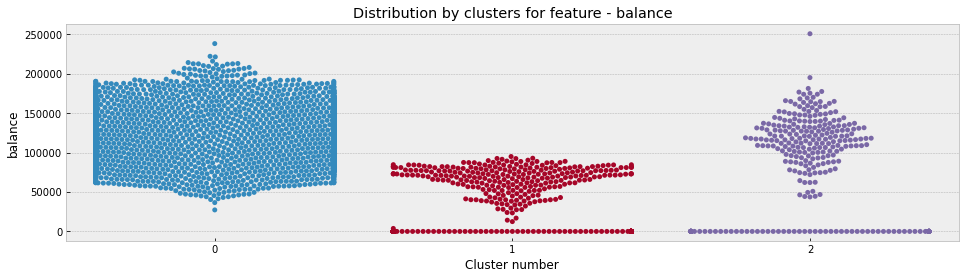

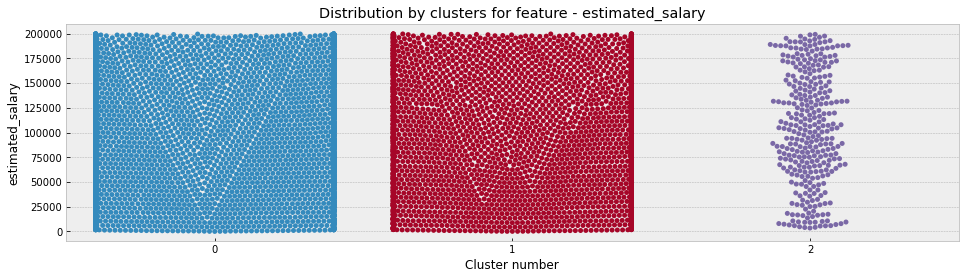

In [83]:
# Visualize the resulting clusters for continuous values
for column in data.drop(columns = ['userid','city','gender', 'objects', 'products','creditcard', 'loyalty', 'churn', 'cluster', 'products_new']).columns:
    fig, ax = plt.subplots(figsize=(16,4))
    sns.swarmplot(data.cluster,data[column], ax=ax)
    plt.title('Distribution by clusters for feature - '+ str(column))
    plt.xlabel('Cluster number')
    plt.show()

#### Task: Calculate the share of outflow (churn rate) for each resulting cluster

In [84]:
data.head()

userid  score  city  gender  age  objects    balance  products  \
0  15677338  619    1     1       42   2        0.01       1          
1  15690047  608    3     1       41   1        83807.86   1          
2  15662040  502    1     1       42   8        159660.80  3          
3  15744090  699    1     1       39   1        0.01       2          
4  15780624  850    3     1       43   2        125510.82  1          

   creditcard  loyalty  estimated_salary  churn  products_new  cluster  
0  1           1        101348.88         1      0             1        
1  0           1        112542.58         0      0             0        
2  1           0        113931.57         1      1             2        
3  0           0        93826.63          0      0             1        
4  1           1        79084.10          0      0             0

In [85]:
# Group into clusters based on the number of products
data_grouped = data.groupby('cluster')['products'].agg({'mean','count'}).round(2).sort_values(by='mean').reset_index()
data_grouped.columns = ['Cluster number', 'Number of clients in cluster', 'Average number of products']
data_grouped

Cluster number  Number of clients in cluster  Average number of products
0  0               1.30                          5896                      
1  1               1.75                          3778                      
2  2               3.18                          326

In [86]:
# Group into clusters by churn rate
data_grouped1 = data.groupby('cluster')['churn'].agg({'mean','count'}).round(2).sort_values(by='mean').reset_index()
data_grouped1.columns = ['Cluster number', 'Number of clients in the cluster', 'Average churn (share)']
data_grouped1

Cluster number  Number of clients in the cluster  Average churn (share)
0  1               0.12                              3778                 
1  0               0.22                              5896                 
2  2               0.86                              326

In [87]:
#data.query('cluster == 1')['products'].value_counts()

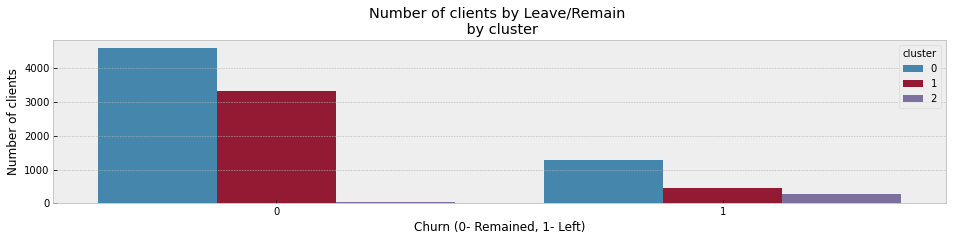

In [88]:
# Visualize it
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='churn',hue='cluster',data=data, ax=ax)
plt.title('Number of clients by Leave/Remain \n by cluster')
plt.ylabel('Number of clients')
plt.xlabel('Churn (0- Remained, 1- Left)')
plt.show()

<a id="clustering3"></a>
### 5.3. See connections with the analysis carried out earlier using methods of grouping and highlighting segments

* let's display the key characteristics of each cluster:

In [89]:
data.drop(['userid', 'score', 'objects','city','gender', 'creditcard', 'loyalty', 'products_new'], axis=1)\
            .groupby('cluster').mean().round(2).reset_index()

cluster    age    balance  products  estimated_salary  churn
0  0        39.15  122279.00  1.30      100508.48         0.22 
1  1        38.16  4818.96    1.75      99065.63          0.12 
2  2        43.65  78821.79   3.18      104400.14         0.86

* **Summurized recommendation for each cluster:**
     - Cluster 0: retain, encourage but do not actively sell. The most stable and promising cluster
     - Cluster 1: wake up, inform, activate
     - Cluster 2: find out needs and provide them. Individual approach